In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf


2024-08-19 22:57:29.771363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 22:57:29.786698: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 22:57:29.791553: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 22:57:29.802763: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-19 22:57:30.556670: W tensorflow/compiler/tf2

In [2]:
train_df=pd.read_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/train.csv')
test_df=pd.read_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/test.csv')
print(train_df.shape,test_df.shape)

(8693, 14) (4277, 13)


In [3]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
#Checking unique values in each cols in train.
for col in train_df.columns:
    print(f'Unique in {col}',train_df[col].unique())
    print(f'Nunique in {col}',train_df[col].nunique())
    print('\n')

Unique in PassengerId ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
Nunique in PassengerId 8693


Unique in HomePlanet ['Europa' 'Earth' 'Mars' nan]
Nunique in HomePlanet 3


Unique in CryoSleep [False True nan]
Nunique in CryoSleep 2


Unique in Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Nunique in Cabin 6560


Unique in Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Nunique in Destination 3


Unique in Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
Nunique in Age 80


Unique in VIP [False True nan]
Nunique in VIP 2


Unique in RoomService [   0.  109.   43. ... 1569. 8586.  745.]
Nunique in RoomService 1273


Unique in FoodCourt [   0.    9. 3

In [5]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:

#Null check function
def null_check(df):
    null_counts = df.isnull().sum()
    null_percentages = (null_counts / len(df)) * 100

    # Create a DataFrame to display this information
    null_info_df = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage (%)': null_percentages
    })

    # Sort the DataFrame by the percentage of null values in descending order
    null_info_df = null_info_df.sort_values(by='Null Percentage (%)', ascending=False)

    # Display the DataFrame
    return null_info_df

In [8]:
null_check(train_df)

,Null Count,Null Percentage (%)
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


In [9]:
#Preparing for training model 1
train_df_model1_main=train_df.copy()
test_df_model1_main=test_df.copy()
print(train_df_model1_main.shape,test_df_model1_main.shape,train_df.shape,test_df.shape)

(8693, 14) (4277, 13) (8693, 14) (4277, 13)


In [10]:
#In order to fill up Null Crysleep let's Analyse
def chi_square_test(feature_list,compare_feat,df):
    for i in feature_list:
        feature1 = df[compare_feat]
        feature2 = df[i]

        # create a contingency table
        contingency_table = pd.crosstab(feature1, feature2)

        # perform Chi-Squared Test
        chi2_stat, p_val, dof, _ = chi2_contingency(contingency_table)

        if p_val < 0.05:
            print(f"There's a significant relationship between {compare_feat} and {i} which is {chi2_stat} and {p_val}")
        else:
            print(f"No significant relationship found between {compare_feat} and {i} which is {chi2_stat} and {p_val}")



In [11]:
feature_list=train_df_model1_main.columns
compare_feat='CryoSleep'
chi_square_test(feature_list,compare_feat,train_df_model1_main)

No significant relationship found between CryoSleep and PassengerId which is 8475.999999999998 and 0.4948931731472326
There's a significant relationship between CryoSleep and HomePlanet which is 116.39843262915673 and 5.301533420141608e-26
There's a significant relationship between CryoSleep and CryoSleep which is 8471.65127115146 and 0.0
No significant relationship found between CryoSleep and Cabin which is 6416.207136114526 and 0.563535131310963
There's a significant relationship between CryoSleep and Destination which is 120.4632146826819 and 6.946168200651804e-27
There's a significant relationship between CryoSleep and Age which is 256.23814583989633 and 1.3875947897651548e-20
There's a significant relationship between CryoSleep and VIP which is 53.75457042560369 and 2.2716514281207392e-13
There's a significant relationship between CryoSleep and RoomService which is 2437.251689569194 and 1.2449587199444992e-78
There's a significant relationship between CryoSleep and FoodCourt which

# Ranking of order of relationship against 'Cryosleep' vs the following features:-
1. **Transported**: p-value = 0.0
   - This is the strongest relationship, with a p-value of 0.0, indicating a virtually certain significant relationship.

2. **VRDeck**: p-value = 3.470741856800832e-85
   - Extremely low p-value, indicating a very strong significant relationship.

3. **Spa**: p-value = 4.372030006644671e-108
   - Another extremely low p-value, suggesting a very strong significant relationship.

4. **ShoppingMall**: p-value = 1.5814411837624314e-95
   - Very low p-value, indicating a strong significant relationship.

5. **FoodCourt**: p-value = 4.8472195590286757e-63
   - Extremely low p-value, indicating a very strong significant relationship.

6. **RoomService**: p-value = 1.2449587199444992e-78
   - Very low p-value, suggesting a strong significant relationship.

7. **Age**: p-value = 1.3875947897651548e-20
   - Very low p-value, indicating a strong significant relationship.

8. **Destination**: p-value = 6.946168200651804e-27
   - Extremely low p-value, indicating a very strong significant relationship.

9. **HomePlanet**: p-value = 5.301533420141608e-26
   - Very low p-value, suggesting a strong significant relationship.

10. **VIP**: p-value = 2.2716514281207392e-13
    - Very low p-value, indicating a strong significant relationship.

11. **CryoSleep** (self-relationship): p-value = 0.0
    - This is a self-relationship, which is not typically informative for analysis but is noted here for completeness.

12. **PassengerId**: p-value = 0.4948931731472326
    - Higher p-value, indicating no significant relationship.

13. **Cabin**: p-value = 0.563535131310963
    - Higher p-value, indicating no significant relationship.

14. **Name**: p-value = 0.5069290620875312
    - Higher p-value, indicating no significant relationship.

This ranking shows the features in order of their statistical significance in relation to 'CryoSleep', with the lowest p-values indicating the strongest relationships.

In [12]:
#CryoSleep vs Transported
contingency_table_cryosleep = pd.crosstab(train_df_model1_main['CryoSleep'], train_df_model1_main['Transported'])

# Calculate percentages
contingency_table_cryosleep_percent = contingency_table_cryosleep.div(contingency_table_cryosleep.sum(axis=1), axis=0) * 100

print(contingency_table_cryosleep_percent)
# People with cryosleep are transported more

Transported      False      True 
CryoSleep                        
False        67.107924  32.892076
True         18.241686  81.758314


In [13]:
null_cryosleep_records = train_df_model1_main[train_df_model1_main['CryoSleep'].isnull()]
null_cryosleep_records['Transported'].value_counts()
#We can mention Cryosleep =true for transported =True and vice versa but let's analyse more

Transported
False    111
True     106
Name: count, dtype: int64

In [14]:
null_cryosleep_records.isnull().sum()

PassengerId       0
HomePlanet        2
CryoSleep       217
Cabin             7
Destination       4
Age               1
VIP               7
RoomService       2
FoodCourt         3
ShoppingMall      8
Spa               5
VRDeck            7
Name             10
Transported       0
dtype: int64

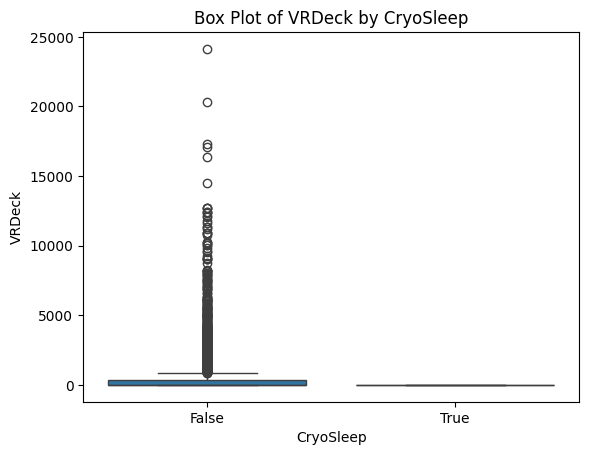

In [15]:
#Now lets check relationship between cryosleep and VRDeck
sns.boxplot(x='CryoSleep', y='VRDeck', data=train_df_model1_main)
plt.title('Box Plot of VRDeck by CryoSleep')
plt.show()

#People not in CryoSleep spent money on VRDeck

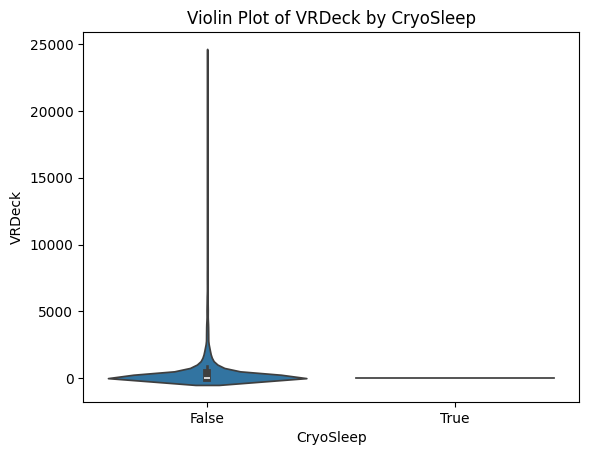

In [16]:
sns.violinplot(x='CryoSleep', y='VRDeck', data=train_df_model1_main)
plt.title('Violin Plot of VRDeck by CryoSleep')
plt.show()

#This plot reinforces our previous claim

In [17]:
# Divide the dataset into two subsets based on 'CryoSleep'
cryosleep_true = train_df_model1_main[train_df_model1_main['CryoSleep'] == True]
cryosleep_false = train_df_model1_main[train_df_model1_main['CryoSleep'] == False]


In [18]:
cryosleep_true[['VRDeck','RoomService','FoodCourt','ShoppingMall','Spa','Age']].describe().T


,count,mean,std,min,25%,50%,75%,max
VRDeck,2975.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
RoomService,2969.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
FoodCourt,2967.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
ShoppingMall,2941.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Spa,2972.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Age,2955.0,27.405415,15.080469,0.0,18.0,26.0,37.0,78.0


In [19]:
cryosleep_false[['VRDeck','RoomService','FoodCourt','ShoppingMall','Spa','Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
VRDeck,5320.0,475.716165,1404.174304,0.0,0.0,4.0,356.00,24133.0
RoomService,5328.0,350.146772,803.080320,0.0,0.0,3.0,390.25,14327.0
FoodCourt,5329.0,713.004316,1970.547985,0.0,0.0,5.0,537.00,29813.0
ShoppingMall,5335.0,270.586504,741.756155,0.0,0.0,2.0,242.00,23492.0
Spa,5326.0,486.092940,1396.233751,0.0,0.0,7.0,354.75,22408.0
Age,5343.0,29.651319,14.075540,0.0,20.0,27.0,38.00,79.0


In [20]:
cryosleep_true['Destination'].value_counts(normalize=True)
#['VRDeck','RoomService','FoodCourt','ShoppingMall','Spa','Age']=0 and Destination='55 Cancri e'  or 'PSO J318.5-22' then True

Destination
TRAPPIST-1e      0.624624
55 Cancri e      0.247240
PSO J318.5-22    0.128137
Name: proportion, dtype: float64

In [21]:
cryosleep_false['Destination'].value_counts(normalize=True)
#['VRDeck','RoomService','FoodCourt','ShoppingMall','Spa','Age']!=0 and Destination='TRAPPIST-1e' then False

Destination
TRAPPIST-1e      0.734225
55 Cancri e      0.191561
PSO J318.5-22    0.074214
Name: proportion, dtype: float64

In [22]:
cryosleep_true['HomePlanet'].value_counts(normalize=True)
#['VRDeck','RoomService','FoodCourt','ShoppingMall','Spa','Age']=0 and Destination='55 Cancri e'  or 'PSO J318.5-22' and HomePlanet='Europa' or 'Mars' then True

HomePlanet
Earth     0.466577
Europa    0.307562
Mars      0.225861
Name: proportion, dtype: float64

In [23]:
cryosleep_false['HomePlanet'].value_counts(normalize=True)
#['VRDeck','RoomService','FoodCourt','ShoppingMall','Spa','Age']!=0 and Destination='TRAPPIST-1e' and HomePlanet='Earth' then False

HomePlanet
Earth     0.584384
Europa    0.218627
Mars      0.196990
Name: proportion, dtype: float64

In [24]:
import pandas as pd

# Define the conditions
con1 = (train_df_model1_main[['VRDeck', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'Age']] == 0).all(axis=1) & \
       (train_df_model1_main['Destination'].isin(['55 Cancri e', 'PSO J318.5-22'])) & \
       (train_df_model1_main['HomePlanet'].isin(['Europa', 'Mars']))

con2 = (train_df_model1_main[['VRDeck', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'Age']]!= 0).any(axis=1) & \
       (train_df_model1_main['Destination'] == 'TRAPPIST-1e') & \
       (train_df_model1_main['HomePlanet'] == 'Earth')

# Fill the null values based on the conditions
train_df_model1_main.loc[(train_df_model1_main['CryoSleep'].isnull()) & con1, 'CryoSleep'] = True
train_df_model1_main.loc[(train_df_model1_main['CryoSleep'].isnull()) & con2, 'CryoSleep'] = False


test_df_model1_main.loc[(test_df_model1_main['CryoSleep'].isnull()) & con1, 'CryoSleep'] = True
test_df_model1_main.loc[(test_df_model1_main['CryoSleep'].isnull()) & con2, 'CryoSleep'] = False

In [25]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639
RoomService,181,2.082135


In [26]:
null_cryosleep_records[['VRDeck','RoomService','FoodCourt','ShoppingMall','Spa','Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
VRDeck,210.0,295.142857,1079.629716,0.0,0.0,0.0,18.00,9811.0
RoomService,215.0,218.413953,729.552827,0.0,0.0,0.0,38.00,8243.0
FoodCourt,214.0,460.920561,1435.890781,0.0,0.0,0.0,79.75,16263.0
ShoppingMall,209.0,145.995215,370.079039,0.0,0.0,0.0,5.00,2179.0
Spa,212.0,277.641509,877.796289,0.0,0.0,0.0,28.25,6075.0
Age,216.0,27.921296,14.817912,0.0,18.0,25.0,37.00,73.0


In [27]:
null_cryosleep_records['HomePlanet'].value_counts(normalize=True)

HomePlanet
Earth     0.530233
Europa    0.269767
Mars      0.200000
Name: proportion, dtype: float64

In [28]:
null_cryosleep_records['Destination'].value_counts(normalize=True)

Destination
TRAPPIST-1e      0.704225
55 Cancri e      0.206573
PSO J318.5-22    0.089202
Name: proportion, dtype: float64

In [29]:
cryosleep_true['HomePlanet'].value_counts(normalize=True)

HomePlanet
Earth     0.466577
Europa    0.307562
Mars      0.225861
Name: proportion, dtype: float64

In [30]:
cryosleep_false['Destination'].value_counts(normalize=True)

Destination
TRAPPIST-1e      0.734225
55 Cancri e      0.191561
PSO J318.5-22    0.074214
Name: proportion, dtype: float64

In [31]:
null_check(train_df_model1_main)


,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639
RoomService,181,2.082135


In [32]:
mask = (train_df_model1_main['Destination'] == 'TRAPPIST-1e') | \
       (train_df_model1_main['HomePlanet'] == 'Europa') | \
       (train_df_model1_main['HomePlanet'] == 'Mars')

train_df_model1_main.loc[train_df_model1_main['CryoSleep'].isnull() & mask, 'CryoSleep'] = True
train_df_model1_main.loc[train_df_model1_main['CryoSleep'].isnull(), 'CryoSleep'] = False



test_df_model1_main.loc[test_df_model1_main['CryoSleep'].isnull() & mask, 'CryoSleep'] = True
test_df_model1_main.loc[test_df_model1_main['CryoSleep'].isnull(), 'CryoSleep'] = False

In [33]:
null_check(train_df_model1_main)


,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639
RoomService,181,2.082135


In [34]:
null_check(test_df_model1_main)
#Cryosleep is finally filled up in train and test

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
VIP,93,2.174421
Destination,92,2.151040
Age,91,2.127660
HomePlanet,87,2.034136
RoomService,82,1.917232


In [35]:
#Now let's start analysis for VIP. 

compare_feat='VIP'
chi_square_test(feature_list,compare_feat,train_df_model1_main)

No significant relationship found between VIP and PassengerId which is 8490.000000000002 and 0.494897385514247
There's a significant relationship between VIP and HomePlanet which is 262.11766213564727 and 1.2074603056505099e-57
There's a significant relationship between VIP and CryoSleep which is 49.99405037545142 and 1.5421286628554868e-12
No significant relationship found between VIP and Cabin which is 5961.771952168078 and 0.9999877189593614
There's a significant relationship between VIP and Destination which is 17.38596229632209 and 0.0001677591650957139
There's a significant relationship between VIP and Age which is 244.26612832636454 and 8.930033301360026e-19
There's a significant relationship between VIP and VIP which is 8446.36888236475 and 0.0
There's a significant relationship between VIP and RoomService which is 2023.3906090507996 and 3.274325752790458e-39
There's a significant relationship between VIP and FoodCourt which is 3819.8309966431757 and 2.6399323429960407e-205
The

# Relationship Rankings VIP vs other features Based on Significance

Here are the ranked relationships based on the significance, indicated by the probability values (p-values). The lower the p-value, the more significant the relationship.

1. **VIP and FoodCourt** - p-value: 2.6399323429960407e-205
   - This is by far the most significant relationship, indicating a very strong association between VIP status and spending at the FoodCourt.

2. **VIP and VRDeck** - p-value: 1.0550930091711305e-133
   - The second most significant relationship, suggesting a strong association between VIP status and spending on VRDeck.

3. **VIP and Spa** - p-value: 6.176547383036739e-91
   - A highly significant relationship, indicating a strong association between VIP status and spending at the Spa.

4. **VIP and HomePlanet** - p-value: 1.2074603056505099e-57
   - A very significant relationship, suggesting that the planet of origin strongly influences VIP status.

5. **VIP and RoomService** - p-value: 3.274325752790458e-39
   - A highly significant relationship, indicating a strong association between VIP status and spending on RoomService.

6. **VIP and Age** - p-value: 8.930033301360026e-19
   - A very significant relationship, suggesting that age plays a strong role in determining VIP status.

7. **VIP and CryoSleep** - p-value: 1.5421286628554868e-12
   - A significant relationship, indicating that VIP status is associated with CryoSleep status.

8. **VIP and ShoppingMall** - p-value: 1.2470740223164704e-15
   - A significant relationship, suggesting an association between VIP status and spending at the ShoppingMall.

9. **VIP and Destination** - p-value: 0.0001677591650957139
   - A significant relationship, indicating that the destination is associated with VIP status.

10. **VIP and Transported** - p-value: 0.0006804064556968345
    - A significant relationship, suggesting that VIP status might influence the 'Transported' status.

11. **VIP and VIP** - p-value: 0.0
    - This is a trivial result since it's comparing the VIP status with itself.

12. **No Significant Relationship:**
    - **PassengerId** - p-value: 0.494897385514247
    - **Cabin** - p-value: 0.9999877189593614
    - **Name** - p-value: 0.4331612017670638

These rankings show the features that have the strongest and weakest relationships with the VIP status, providing insights into which factors are most influential in determining VIP status in your dataset.

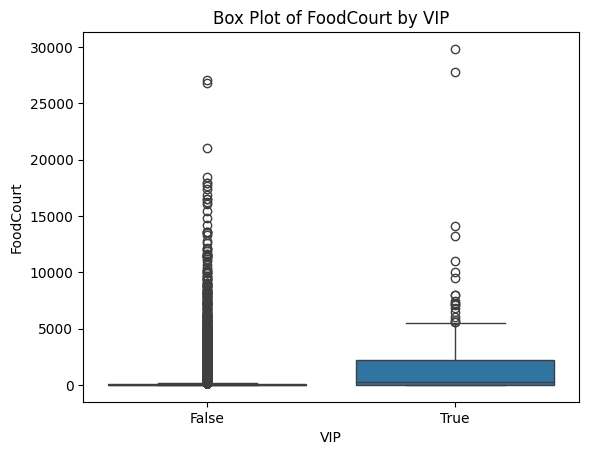

In [36]:
#Now lets check relationship between cryosleep and VRDeck
sns.boxplot(x='VIP', y='FoodCourt', data=train_df_model1_main)
plt.title('Box Plot of FoodCourt by VIP')
plt.show()

#People not in CryoSleep spent money on VRDeck

In [37]:
train_df_model1_main['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [38]:
summary_vip_true = train_df_model1_main[train_df_model1_main['VIP'] == True]['FoodCourt'].describe().T
summary_vip_false = train_df_model1_main[train_df_model1_main['VIP'] == False]['FoodCourt'].describe().T

print("Summary statistics for FoodCourt when VIP is True:")
print(summary_vip_true)

print("\nSummary statistics for FoodCourt when VIP is False:")
print(summary_vip_false)

Summary statistics for FoodCourt when VIP is True:
count      193.000000
mean      1811.393782
std       3758.336442
min          0.000000
25%          0.000000
50%        287.000000
75%       2191.000000
max      29813.000000
Name: FoodCourt, dtype: float64

Summary statistics for FoodCourt when VIP is False:
count     8118.000000
mean       426.336536
std       1505.278247
min          0.000000
25%          0.000000
50%          0.000000
75%         56.750000
max      27071.000000
Name: FoodCourt, dtype: float64


In [39]:
train_df_model1_main.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [40]:
# Calculate mean and std for VIP True and False
vip_true_mean = train_df_model1_main[train_df_model1_main['VIP'] == True]['FoodCourt'].mean()
vip_true_std = train_df_model1_main[train_df_model1_main['VIP'] == True]['FoodCourt'].std()
vip_false_mean = train_df_model1_main[train_df_model1_main['VIP'] == False]['FoodCourt'].mean()
vip_false_std = train_df_model1_main[train_df_model1_main['VIP'] == False]['FoodCourt'].std()

# Probability functions
def normal_pdf(x, mean, std):
    return np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

def vip_probability(spending):
    if np.isnan(spending):
        return np.nan
    prob_true = normal_pdf(spending, vip_true_mean, vip_true_std)
    prob_false = normal_pdf(spending, vip_false_mean, vip_false_std)
    return prob_true / (prob_true + prob_false)

# Apply probabilistic imputation
def impute_vip(row):
    if pd.isna(row['VIP']):
        prob = vip_probability(row['FoodCourt'])
        return prob > 0.5 if not np.isnan(prob) else np.nan
    return row['VIP']

train_df_model1_main['VIP'] = train_df_model1_main.apply(impute_vip, axis=1)
test_df_model1_main['VIP'] = test_df_model1_main.apply(impute_vip, axis=1)

# Fill remaining missing with mode
vip_mode = train_df_model1_main['VIP'].mode()[0]
train_df_model1_main.loc[:, 'VIP'] = train_df_model1_main['VIP'].map(lambda x: vip_mode if pd.isna(x) else x).astype('bool')
test_df_model1_main.loc[:, 'VIP'] = test_df_model1_main['VIP'].map(lambda x: vip_mode if pd.isna(x) else x).astype('bool')

In [41]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639
RoomService,181,2.082135
Age,179,2.059128


In [42]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
Destination,92,2.151040
Age,91,2.127660
HomePlanet,87,2.034136
RoomService,82,1.917232
VRDeck,80,1.870470


In [43]:
train_df_model1_main['VIP'].value_counts()
#VIP nulls are also resolved now.

VIP
False    8486
True      207
Name: count, dtype: int64

In [44]:
#Now let's start analysis for HomePlanet. 

compare_feat='HomePlanet'
chi_square_test(feature_list,compare_feat,train_df_model1_main)

No significant relationship found between HomePlanet and PassengerId which is 16984.000000000004 and 0.4942278091193484
There's a significant relationship between HomePlanet and HomePlanet which is 16984.0 and 0.0
There's a significant relationship between HomePlanet and CryoSleep which is 168.20682065545097 and 2.980938289044753e-37
There's a significant relationship between HomePlanet and Cabin which is 16598.0 and 1.982087890069544e-101
There's a significant relationship between HomePlanet and Destination which is 1144.18502191443 and 2.0026455334311217e-246
There's a significant relationship between HomePlanet and Age which is 966.581615603843 and 3.161992982469256e-116
There's a significant relationship between HomePlanet and VIP which is 275.10425044924517 and 1.827557461849803e-60
There's a significant relationship between HomePlanet and RoomService which is 3525.789454692869 and 2.3898307743331885e-37
There's a significant relationship between HomePlanet and FoodCourt which is 

## HomePlanet Relationships (Strongest to Weakest)

| Relationship | Statistic | p-value | Strength |
|---|---|---|---|
| HomePlanet vs. Destination | 1144.185 | 2.0026455334311217e-246 | Extremely Strong |
| HomePlanet vs. Cabin | 16598.0 | 1.982087890069544e-101 | Extremely Strong |
| HomePlanet vs. Age | 966.581615603843 | 3.161992982469256e-116 | Extremely Strong |
| HomePlanet vs. Transported | 324.9013834000382 | 2.809059985251311e-71 | Extremely Strong |
| HomePlanet vs. VIP | 275.10425044924517 | 1.827557461849803e-60 | Very Strong |
| HomePlanet vs. CryoSleep | 168.20682065545097 | 2.980938289044753e-37 | Very Strong |
| HomePlanet vs. RoomService | 3525.789454692869 | 2.3898307743331885e-37 | Very Strong |
| HomePlanet vs. FoodCourt | 3656.8789208150624 | 4.549661473085215e-16 | Strong |
| HomePlanet vs. ShoppingMall | 2753.831041392489 | 7.457479755956384e-15 | Strong |
| HomePlanet vs. Spa | 2975.6626362488714 | 2.313437086722974e-06 | Moderate |
| HomePlanet vs. VRDeck | 2937.744908878163 | 3.91037939637667e-07 | Moderate |
| HomePlanet vs. Name | 16598.0 | 0.4073841713193042 | No Significant Relationship |
| HomePlanet vs. PassengerId | 16984.000000000004 | 0.4942278091193484 | No Significant Relationship |
| HomePlanet vs. HomePlanet | 16984.0 | 0.0 | Perfect Correlation (Trivial) | 

**Notes:**

* The numbers in parentheses represent the statistic and p-value.
* **Stronger relationships** have lower p-values (closer to 0).
* **Perfect correlation** (like HomePlanet vs. HomePlanet) is expected and doesn't tell us anything useful.

**Remember:**  The strength of a relationship doesn't necessarily mean it's *causative*.  Further analysis is needed to understand the nature of these relationships. 

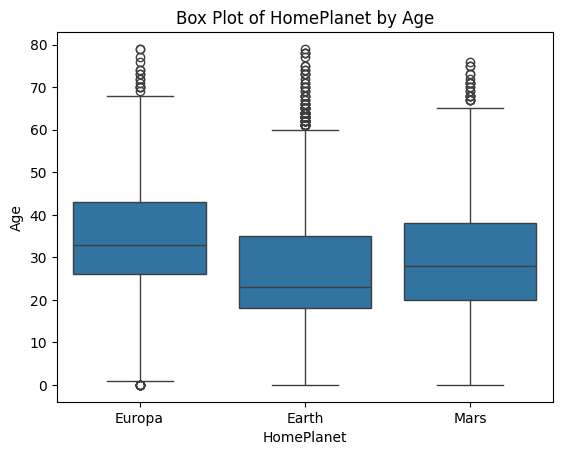

In [45]:
#Now lets check relationship between HomePlanet and Age
sns.boxplot(x='HomePlanet', y='Age', data=train_df_model1_main)
plt.title('Box Plot of HomePlanet by Age')
plt.show()

#Seems like Europa has higher age people

In [46]:
#Creating contigency table between HomePlanet and Destination
contingency_table =  pd.crosstab(train_df_model1_main['HomePlanet'], train_df_model1_main['Destination'], normalize='index') * 100

# Display the table
print(contingency_table)

#If Destination is TRAPPIST-1e then homeplanet is Mars


Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth          15.323118      15.811681    68.865201
Europa         42.311366       0.907354    56.781280
Mars           11.240536       2.853815    85.905649


In [47]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639
RoomService,181,2.082135
Age,179,2.059128


In [48]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
Destination,92,2.151040
Age,91,2.127660
HomePlanet,87,2.034136
RoomService,82,1.917232
VRDeck,80,1.870470


In [49]:
# Fill missing 'HomePlanet' values where 'Destination' is 'TRAPPIST-1e' with 'Mars'
train_df_model1_main.loc[(train_df_model1_main['HomePlanet'].isnull()) & (train_df_model1_main['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'
test_df_model1_main.loc[(test_df_model1_main['HomePlanet'].isnull()) & (test_df_model1_main['Destination'] == 'TRAPPIST-1e'), 'HomePlanet'] = 'Mars'

In [50]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639
RoomService,181,2.082135
Age,179,2.059128
HomePlanet,51,0.586679


In [51]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
Destination,92,2.151040
Age,91,2.127660
RoomService,82,1.917232
VRDeck,80,1.870470
HomePlanet,31,0.724807


In [52]:
#Creating contigency table between HomePlanet and VIP
contingency_table =  pd.crosstab(train_df_model1_main['HomePlanet'], train_df_model1_main['VIP'], normalize='index') * 100

# Display the table
print(contingency_table)

#If VIP is False then homeplanet is Earth


VIP             False     True 
HomePlanet                     
Earth       99.978270  0.021730
Europa      93.524167  6.475833
Mars        96.542693  3.457307


In [53]:
# Fill missing 'HomePlanet' values Transported is True then homeplanet is Europa
train_df_model1_main.loc[(train_df_model1_main['HomePlanet'].isnull()) & (train_df_model1_main['VIP'] == False), 'HomePlanet'] = 'Earth'
test_df_model1_main.loc[(test_df_model1_main['HomePlanet'].isnull()) & (test_df_model1_main['VIP'] == False), 'HomePlanet'] = 'Earth'

In [54]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639
RoomService,181,2.082135
Age,179,2.059128
HomePlanet,2,0.023007


In [55]:
null_check(test_df_model1_main)
#VIP now handled

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
Destination,92,2.151040
Age,91,2.127660
RoomService,82,1.917232
VRDeck,80,1.870470
PassengerId,0,0.000000


In [56]:
#Now let's start analysis for Destination. 

compare_feat='Destination'
chi_square_test(feature_list,compare_feat,train_df_model1_main)

No significant relationship found between Destination and PassengerId which is 17022.0 and 0.49423425556080314
There's a significant relationship between Destination and HomePlanet which is 1206.2007997357377 and 7.209969489896102e-260
There's a significant relationship between Destination and CryoSleep which is 114.81922957589126 and 1.1676726000144222e-25
There's a significant relationship between Destination and Cabin which is 13420.91271515887 and 0.00031900345250094865
There's a significant relationship between Destination and Destination which is 17022.0 and 0.0
No significant relationship found between Destination and Age which is 184.30833535207978 and 0.0746518678875782
There's a significant relationship between Destination and VIP which is 19.923271062549524 and 4.7175515881962e-05
No significant relationship found between Destination and RoomService which is 1909.6709304966887 and 1.0
No significant relationship found between Destination and FoodCourt which is 2819.183356695

# Relationship Between Destination and Other Features

The following table summarizes the relationships between `Destination` and various features, ranked by p-value (from smallest to largest):

| Feature        | Relationship Value | p-value                             | Significant Relationship |
|----------------|--------------------|-------------------------------------|--------------------------|
| HomePlanet     | 1206.20            | 7.21e-260                           | Yes                      |
| CryoSleep      | 114.82             | 1.17e-25                            | Yes                      |
| Transported    | 106.39             | 7.89e-24                            | Yes                      |
| VIP            | 19.92              | 4.72e-05                            | Yes                      |
| Cabin          | 13420.91           | 0.000319                            | Yes                      |
| Destination    | 17022.00           | 0.0                                 | Yes                      |
| Age            | 184.31             | 0.075                               | No                       |
| PassengerId    | 17022.00           | 0.49                                | No                       |
| RoomService    | 1909.67            | 1.0                                 | No                       |
| FoodCourt      | 2819.18            | 0.976                               | No                       |
| ShoppingMall   | 1906.01            | 0.999998                            | No                       |
| Spa            | 2328.61            | 0.999981                            | No                       |
| VRDeck         | 2538.55            | 0.716                               | No                       |
| Name           | 16596.40           | 0.480                               | No                       |

**Note:** A lower p-value indicates stronger evidence against the null hypothesis, suggesting a significant relationship. A p-value less than 0.05 is typically considered significant.

In [57]:
#Creating contigency table between HomePlanet and Destination
contingency_table =  pd.crosstab(train_df_model1_main['Destination'], train_df_model1_main['HomePlanet'], normalize='index') * 100

# Display the table
print(contingency_table)

#If homeplanet is Earth then destination is PSO J318.5-22


HomePlanet         Earth     Europa       Mars
Destination                                   
55 Cancri e    39.988877  49.276974  10.734149
PSO J318.5-22  91.457286   2.386935   6.155779
TRAPPIST-1e    52.426036  20.101437  27.472527


In [58]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639
RoomService,181,2.082135
Age,179,2.059128
HomePlanet,2,0.023007


In [59]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
Destination,92,2.151040
Age,91,2.127660
RoomService,82,1.917232
VRDeck,80,1.870470
PassengerId,0,0.000000


In [60]:
# Fill homeplanet is Earth then destination is PSO J318.5-22
train_df_model1_main.loc[(train_df_model1_main['Destination'].isnull()) & (train_df_model1_main['HomePlanet'] == 'Earth'), 'Destination'] = 'PSO J318.5-22'
test_df_model1_main.loc[(test_df_model1_main['Destination'].isnull()) & (test_df_model1_main['HomePlanet'] == 'Earth'), 'Destination'] = 'PSO J318.5-22'

In [61]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
RoomService,181,2.082135
Age,179,2.059128
Destination,79,0.908777
HomePlanet,2,0.023007


In [62]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
Age,91,2.127660
RoomService,82,1.917232
VRDeck,80,1.870470
Destination,45,1.052139
PassengerId,0,0.000000


In [63]:
#Creating contigency table between Desination and CryoSleep
contingency_table =  pd.crosstab(train_df_model1_main['Destination'], train_df_model1_main['CryoSleep'], normalize='index') * 100

# Display the table
print(contingency_table)

#If Cryosleep is False then destination is TRAPPIST-1e


CryoSleep          False      True 
Destination                        
55 Cancri e    57.277778  42.722222
PSO J318.5-22  55.728587  44.271413
TRAPPIST-1e    67.269653  32.730347


In [64]:
#Creating contigency table between Desination and VIP
contingency_table =  pd.crosstab(train_df_model1_main['Destination'], train_df_model1_main['VIP'], normalize='index') * 100

# Display the table
print(contingency_table)

#If Cryosleep is False and VIP is False then destination is TRAPPIST-1e



VIP                False     True 
Destination                       
55 Cancri e    96.166667  3.833333
PSO J318.5-22  97.997775  2.002225
TRAPPIST-1e    98.005072  1.994928


In [65]:
# Fill missing values in the 'Destination' column based on the conditions
train_df_model1_main.loc[
    (train_df_model1_main['Destination'].isnull()),  # Check for missing values
    'Destination'
] = train_df_model1_main.apply(
    lambda row: 'TRAPPIST-1e' if (row['CryoSleep'] == False and row['VIP'] == False) else '55 Cancri e', 
    axis=1
)

# Fill missing values in the 'Destination' column based on the conditions
test_df_model1_main.loc[
    (test_df_model1_main['Destination'].isnull()),  # Check for missing values
    'Destination'
] = test_df_model1_main.apply(
    lambda row: 'TRAPPIST-1e' if (row['CryoSleep'] == False and row['VIP'] == False) else '55 Cancri e', 
    axis=1
)

In [66]:
homeplanet_mode = train_df_model1_main['HomePlanet'].mode()[0]

# Fill missing values in 'HomePlanet' with the mode
train_df_model1_main['HomePlanet'] = train_df_model1_main['HomePlanet'].fillna(homeplanet_mode)
test_df_model1_main['HomePlanet'] = test_df_model1_main['HomePlanet'].fillna(homeplanet_mode)

In [67]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
RoomService,181,2.082135
Age,179,2.059128
PassengerId,0,0.000000
HomePlanet,0,0.000000


In [68]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
Age,91,2.127660
RoomService,82,1.917232
VRDeck,80,1.870470
PassengerId,0,0.000000
HomePlanet,0,0.000000


In [69]:
train_df_model1_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [70]:
#Now let's start analysis for Cabin. 

compare_feat='Cabin'
chi_square_test(feature_list,compare_feat,train_df_model1_main)

No significant relationship found between Cabin and PassengerId which is 55712146.0000051 and 0.26715453950209056
There's a significant relationship between Cabin and HomePlanet which is 16798.333750436537 and 3.135849175844341e-97
No significant relationship found between Cabin and CryoSleep which is 6543.754543647641 and 0.550684196811521
There's a significant relationship between Cabin and Cabin which is 55712145.999999985 and 0.0
There's a significant relationship between Cabin and Destination which is 13723.66936885948 and 0.00011331259937679512
No significant relationship found between Cabin and Age which is 486272.2462714549 and 1.0
No significant relationship found between Cabin and VIP which is 6053.25418953249 and 0.9999970328863995
There's a significant relationship between Cabin and RoomService which is 8891423.053166833 and 0.0
No significant relationship found between Cabin and FoodCourt which is 9357639.595276348 and 1.0
There's a significant relationship between Cabin a

| Relationship                | Statistic Value          | p-value                  | Significance         |
|-----------------------------|--------------------------|--------------------------|-----------------------|
| Cabin and HomePlanet        | 16798.33                 | 3.14e-97                 | Significant           |
| Cabin and Spa               | 8460884.82               | 3.64e-38                 | Significant           |
| Cabin and RoomService       | 8891423.05               | 0.0                      | Significant           |
| Cabin and ShoppingMall      | 7848356.96               | 0.0                      | Significant           |
| Cabin and Cabin             | 55712146.00              | 0.0                      | Significant           |
| Cabin and Destination       | 13723.67                 | 0.0001133                | Significant           |
| Cabin and Transported       | 6849.94                  | 0.00605                  | Significant           |
| Cabin and PassengerId       | 55712146.00              | 0.26715                  | Not Significant       |
| Cabin and CryoSleep         | 6543.75                  | 0.55068                  | Not Significant       |
| Cabin and Age               | 486272.25                | 1.0                      | Not Significant       |
| Cabin and VIP               | 6053.25                  | 0.999997                 | Not Significant       |
| Cabin and FoodCourt         | 9357639.60               | 1.0                      | Not Significant       |
| Cabin and VRDeck            | 8299205.12               | 0.98030                  | Not Significant       |
| Cabin and Name              | 53264468.00              | 0.78493                  | Not Significant       |

In [71]:
train_df_model1_main.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [72]:
train_df_model1_main[['Deck', 'Cabin_Number', 'Category']] = train_df_model1_main['Cabin'].str.split('/', expand=True)
test_df_model1_main[['Deck', 'Cabin_Number', 'Category']] = test_df_model1_main['Cabin'].str.split('/', expand=True)

In [73]:
train_df_model1_main = train_df_model1_main.drop('Cabin', axis=1)
test_df_model1_main = test_df_model1_main.drop('Cabin', axis=1)


In [74]:
train_df_model1_main.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_Number,Category
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [75]:
train_df_model1_main['Deck'].value_counts()

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [76]:
train_df_model1_main['Cabin_Number'].value_counts()

Cabin_Number
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64

In [77]:
train_df_model1_main['Category'].value_counts()

Category
S    4288
P    4206
Name: count, dtype: int64

In [78]:
train_df_model1_main.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Cabin_Number    199
Category        199
dtype: int64

In [79]:
feature_list

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [80]:
feature_list = feature_list.tolist() 
feature_list.remove('Cabin')

In [81]:
#Now let's start analysis for Category. 

compare_feat='Category'
chi_square_test(feature_list,compare_feat,train_df_model1_main)

No significant relationship found between Category and PassengerId which is 8494.000000000002 and 0.4948985871344006
There's a significant relationship between Category and HomePlanet which is 13.172673044640893 and 0.0013790829601712023
No significant relationship found between Category and CryoSleep which is 2.763510961819346 and 0.09643638359168169
No significant relationship found between Category and Destination which is 1.9942344264656642 and 0.3689414892499291
No significant relationship found between Category and Age which is 58.951358299896505 and 0.9554322472700444
No significant relationship found between Category and VIP which is 0.7265823407004958 and 0.3939932329892495
No significant relationship found between Category and RoomService which is 1234.968683730619 and 0.6512323515704128
No significant relationship found between Category and FoodCourt which is 1483.4686187369898 and 0.4551271054456927
No significant relationship found between Category and ShoppingMall which i

| Feature | p-value | Significance |
|---|---|---|
| Category vs. Transported | 1.3940936254458288e-21 | Highly Significant |
| Category vs. HomePlanet | 0.0013790829601712023 | Significant |
| Category vs. CryoSleep | 0.09643638359168169 | Not Significant |
| Category vs. Destination | 0.3689414892499291 | Not Significant |
| Category vs. VIP | 0.3939932329892495 | Not Significant |
| Category vs. Name | 0.48553820500049794 | Not Significant |
| Category vs. ShoppingMall | 0.49343029566208413 | Not Significant |
| Category vs. PassengerId | 0.4948985871344006 | Not Significant |
| Category vs. VRDeck | 0.4422653488081894 | Not Significant |
| Category vs. FoodCourt | 0.4551271054456927 | Not Significant |
| Category vs. Spa | 0.2819646482951872 | Not Significant |
| Category vs. RoomService | 0.6512323515704128 | Not Significant |
| Category vs. Age | 0.9554322472700444 | Not Significant |

In [82]:
#Creating contingency between Category and HomePlanet

contingency_table_Category =  pd.crosstab(train_df_model1_main['Category'], train_df_model1_main['HomePlanet'], normalize='index') * 100

# Display the table
print(contingency_table_Category)

# If Homeplanet is Earth then fillna for Category col to P. If Europa then S. If Mars then P

HomePlanet      Earth     Europa       Mars
Category                                   
P           54.469805  22.705659  22.824536
S           52.821828  26.002799  21.175373


In [83]:
# Create a dictionary to map HomePlanet to Category values
category_mapping = {
    'Earth': 'P',
    'Europa': 'S',
    'Mars': 'P'
}

# Fill missing Category values based on HomePlanet
train_df_model1_main['Category'] = train_df_model1_main['Category'].fillna(train_df_model1_main['HomePlanet'].map(category_mapping))

test_df_model1_main['Category'] = test_df_model1_main['Category'].fillna(test_df_model1_main['HomePlanet'].map(category_mapping))

In [84]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
Deck,199,2.289198
Cabin_Number,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
RoomService,181,2.082135
Age,179,2.059128
PassengerId,0,0.000000


In [85]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Deck,100,2.338087
Cabin_Number,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
Age,91,2.127660
RoomService,82,1.917232
VRDeck,80,1.870470
PassengerId,0,0.000000


In [86]:
train_df_model1_main['Deck'].value_counts()

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [87]:
#Now let's start analysis for Deck. 

compare_feat='Deck'
chi_square_test(feature_list,compare_feat,train_df_model1_main)

No significant relationship found between Deck and PassengerId which is 59457.99999999998 and 0.49113108714710374
There's a significant relationship between Deck and HomePlanet which is 9323.747421359803 and 0.0
There's a significant relationship between Deck and CryoSleep which is 874.2420782494194 and 1.750483792301647e-184
There's a significant relationship between Deck and Destination which is 1047.1386502985256 and 1.1974016114863957e-214
There's a significant relationship between Deck and Age which is 1685.5245391984408 and 9.367956014655627e-115
There's a significant relationship between Deck and VIP which is 343.4701313744985 and 3.078300628289383e-70
There's a significant relationship between Deck and RoomService which is 10729.760296140616 and 4.107829431879068e-43
There's a significant relationship between Deck and FoodCourt which is 19184.17573977429 and 0.0
No significant relationship found between Deck and ShoppingMall which is 6834.8597995478 and 0.9999999999999616
There

## Deck Relationships Ranked by Significance

| Relationship | p-value | Significance |
|---|---|---|
| Deck vs. CryoSleep | 1.750483792301647e-184 | Highly Significant |
| Deck vs. Destination | 1.1974016114863957e-214 | Highly Significant |
| Deck vs. Age | 9.367956014655627e-115 | Highly Significant |
| Deck vs. VIP | 3.078300628289383e-70 | Highly Significant |
| Deck vs. Transported | 1.0743307258871414e-80 | Highly Significant |
| Deck vs. RoomService | 4.107829431879068e-43 | Highly Significant |
| Deck vs. Spa | 1.0995740373432826e-303 | Highly Significant |
| Deck vs. HomePlanet | 0.0 | Highly Significant |
| Deck vs. FoodCourt | 0.0 | Highly Significant |
| Deck vs. VRDeck | 0.0 | Highly Significant |
| Deck vs. ShoppingMall | 0.9999999999999616 | Not Significant |
| Deck vs. PassengerId | 0.49113108714710374 | Not Significant |
| Deck vs. Name | 0.4319097004275454 | Not Significant |

In [88]:
#Creating contingency between Deck and Destination

contingency_table_Category =  pd.crosstab(train_df_model1_main['Deck'], train_df_model1_main['Destination'], normalize='index') * 100

# Display the table
print(contingency_table_Category)



Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Deck                                                
A              42.968750       0.781250    56.250000
B              43.902439       0.385109    55.712452
C              43.239625       1.740295    55.020080
D              24.058577       3.556485    72.384937
E              13.470320       6.506849    80.022831
F              14.889048      10.057266    75.053686
G              14.263384      19.773349    65.963267
T               0.000000       0.000000   100.000000


In [89]:
#Creating contingency between Deck and CryoSleep

contingency_table_Category =  pd.crosstab(train_df_model1_main['Deck'], train_df_model1_main['CryoSleep'], normalize='index') * 100

# Display the table
print(contingency_table_Category)



CryoSleep      False      True 
Deck                           
A          71.093750  28.906250
B          43.774069  56.225931
C          57.697456  42.302544
D          76.150628  23.849372
E          79.680365  20.319635
F          79.169649  20.830351
G          47.205940  52.794060
T          80.000000  20.000000


In [90]:
#Contingency of Deck, Destination and Cryosleep

contingency_table = pd.crosstab(
    [train_df_model1_main['Deck'], train_df_model1_main['Destination']],
    train_df_model1_main['CryoSleep'],
    normalize='all'  # This is the key!
)

# Multiply by 100 to get percentages
contingency_table = contingency_table * 100
contingency_table = contingency_table.sort_values(by=True, ascending=False)


print(contingency_table)

CryoSleep               False     True 
Deck Destination                       
G    TRAPPIST-1e    10.572169  9.300683
F    TRAPPIST-1e    18.931010  5.757005
G    PSO J318.5-22   1.683541  4.273605
B    TRAPPIST-1e     2.495879  2.613610
     55 Cancri e     1.495173  2.531198
G    55 Cancri e     1.966094  2.331057
C    55 Cancri e     1.871910  1.930775
     TRAPPIST-1e     3.131622  1.707087
E    TRAPPIST-1e     6.698846  1.554038
F    55 Cancri e     3.908641  0.988933
D    TRAPPIST-1e     3.272899  0.800565
     55 Cancri e     0.812338  0.541559
A    TRAPPIST-1e     1.259713  0.435602
     55 Cancri e     0.871203  0.423829
E    55 Cancri e     0.965387  0.423829
     PSO J318.5-22   0.553332  0.117730
F    PSO J318.5-22   3.202260  0.105957
C    PSO J318.5-22   0.070638  0.082411
A    PSO J318.5-22   0.011773  0.011773
B    PSO J318.5-22   0.023546  0.011773
T    TRAPPIST-1e     0.047092  0.011773
D    PSO J318.5-22   0.200141  0.000000


In [91]:
#Contingency of Deck, Destination and Cryosleep

contingency_table = pd.crosstab(
    [train_df_model1_main['Deck'], train_df_model1_main['Destination']],
    train_df_model1_main['CryoSleep'],
    normalize='all'  # This is the key!
)

# Multiply by 100 to get percentages
contingency_table = contingency_table * 100
contingency_table = contingency_table.sort_values(by=False, ascending=False)


print(contingency_table)

CryoSleep               False     True 
Deck Destination                       
F    TRAPPIST-1e    18.931010  5.757005
G    TRAPPIST-1e    10.572169  9.300683
E    TRAPPIST-1e     6.698846  1.554038
F    55 Cancri e     3.908641  0.988933
D    TRAPPIST-1e     3.272899  0.800565
F    PSO J318.5-22   3.202260  0.105957
C    TRAPPIST-1e     3.131622  1.707087
B    TRAPPIST-1e     2.495879  2.613610
G    55 Cancri e     1.966094  2.331057
C    55 Cancri e     1.871910  1.930775
G    PSO J318.5-22   1.683541  4.273605
B    55 Cancri e     1.495173  2.531198
A    TRAPPIST-1e     1.259713  0.435602
E    55 Cancri e     0.965387  0.423829
A    55 Cancri e     0.871203  0.423829
D    55 Cancri e     0.812338  0.541559
E    PSO J318.5-22   0.553332  0.117730
D    PSO J318.5-22   0.200141  0.000000
C    PSO J318.5-22   0.070638  0.082411
T    TRAPPIST-1e     0.047092  0.011773
B    PSO J318.5-22   0.023546  0.011773
A    PSO J318.5-22   0.011773  0.011773


In [92]:
def fill_missing_deck(row):
    if pd.isnull(row['Deck']):
        destination = row['Destination']
        cryosleep = row['CryoSleep']
        
        # Filter the contingency table for the given destination and cryosleep status
        filtered_table = contingency_table.loc[(slice(None), destination), cryosleep]
        
        # Get the Deck with the highest percentage
        if not filtered_table.empty:
            most_likely_deck = filtered_table.idxmax()[0]  # Get the index of the max value
            return most_likely_deck
    return row['Deck']  # Return the original value if not missing

# Apply the function to fill missing Deck values
train_df_model1_main['Deck'] = train_df_model1_main.apply(fill_missing_deck, axis=1)
test_df_model1_main['Deck'] = test_df_model1_main.apply(fill_missing_deck, axis=1)

In [93]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
Cabin_Number,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
RoomService,181,2.082135
Age,179,2.059128
PassengerId,0,0.000000
HomePlanet,0,0.000000


In [94]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
Cabin_Number,100,2.338087
ShoppingMall,98,2.291326
Name,94,2.197802
Age,91,2.127660
RoomService,82,1.917232
VRDeck,80,1.870470
PassengerId,0,0.000000
HomePlanet,0,0.000000


In [95]:
#Now let's start analysis for Cabin_Number. 

compare_feat='Cabin_Number'
chi_square_test(feature_list,compare_feat,train_df_model1_main)

No significant relationship found between Cabin_Number and PassengerId which is 15425104.000000041 and 0.3718034792872784
There's a significant relationship between Cabin_Number and HomePlanet which is 6277.119668337551 and 1.7213711950675797e-145
No significant relationship found between Cabin_Number and CryoSleep which is 1755.11167586032 and 0.8439317635404621
There's a significant relationship between Cabin_Number and Destination which is 4014.691321302037 and 6.830642387279721e-06
No significant relationship found between Cabin_Number and Age which is 133567.92703314012 and 1.0
No significant relationship found between Cabin_Number and VIP which is 1158.5594034211747 and 1.0
There's a significant relationship between Cabin_Number and RoomService which is 2496364.873079136 and 0.0
No significant relationship found between Cabin_Number and FoodCourt which is 2255669.1787465354 and 1.0
There's a significant relationship between Cabin_Number and ShoppingMall which is 2227154.341883054

| Relationship               | Statistic Value          | P-Value                  | Significant Relationship? |
|----------------------------|--------------------------|--------------------------|---------------------------|
| Cabin_Number and HomePlanet| 6277.12                  | 1.72137e-145             | Yes                       |
| Cabin_Number and Destination| 4014.69                 | 6.83064e-06              | Yes                       |
| Cabin_Number and RoomService| 2496364.87               | 0.0                      | Yes                       |
| Cabin_Number and ShoppingMall| 2227154.34              | 0.0                      | Yes                       |
| Cabin_Number and Transported| 1996.38                 | 0.00181                  | Yes                       |
| Cabin_Number and PassengerId| 15425104.00              | 0.37180                  | No                        |
| Cabin_Number and CryoSleep | 1755.11                  | 0.84393                  | No                        |
| Cabin_Number and Age       | 133567.93                | 1.0                      | No                        |
| Cabin_Number and VIP       | 1158.56                  | 1.0                      | No                        |
| Cabin_Number and FoodCourt  | 2255669.18               | 1.0                      | No                        |
| Cabin_Number and Spa       | 2135248.61               | 1.0                      | No                        |
| Cabin_Number and VRDeck    | 2101202.83               | 1.0                      | No                        |
| Cabin_Number and Name      | 14982782.13              | 0.82201                  | No                        |

In [96]:
#Filling up missing values in Cabin number 
train_df_model1_main['Cabin_Number'] = train_df_model1_main.groupby('HomePlanet')['Cabin_Number'].transform(lambda x: x.fillna(x.mode()[0]))
test_df_model1_main['Cabin_Number'] = test_df_model1_main.groupby('HomePlanet')['Cabin_Number'].transform(lambda x: x.fillna(x.mode()[0]))

In [97]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
RoomService,181,2.082135
Age,179,2.059128
PassengerId,0,0.000000
HomePlanet,0,0.000000
CryoSleep,0,0.000000


In [98]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
ShoppingMall,98,2.291326
Name,94,2.197802
Age,91,2.127660
RoomService,82,1.917232
VRDeck,80,1.870470
PassengerId,0,0.000000
HomePlanet,0,0.000000
CryoSleep,0,0.000000


In [99]:
train_df_model1_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Deck          8693 non-null   object 
 14  Cabin_Number  8693 non-null   object 
 15  Category      8693 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [100]:
float64_columns_null_fill_analysis = train_df_model1_main.select_dtypes(include=['float64']).copy()

In [101]:
correlation_matrix = float64_columns_null_fill_analysis.corr()
# Extract the correlations for 'Age'
age_correlation = correlation_matrix['Age']

# Sort the correlations in descending order
sorted_age_correlation = age_correlation.sort_values(ascending=False)
sorted_age_correlation
#Didn't find any proper relation

Age             1.000000
FoodCourt       0.130421
Spa             0.123970
VRDeck          0.101007
RoomService     0.068723
ShoppingMall    0.033133
Name: Age, dtype: float64

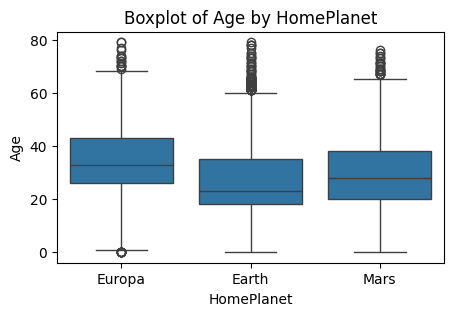

In [102]:

plt.figure(figsize=(5, 3))
sns.boxplot(x='HomePlanet', y='Age', data=train_df_model1_main)
plt.title('Boxplot of Age by HomePlanet')
plt.show()


Text(0.5, 1.0, 'Boxplot of Age by Destination')

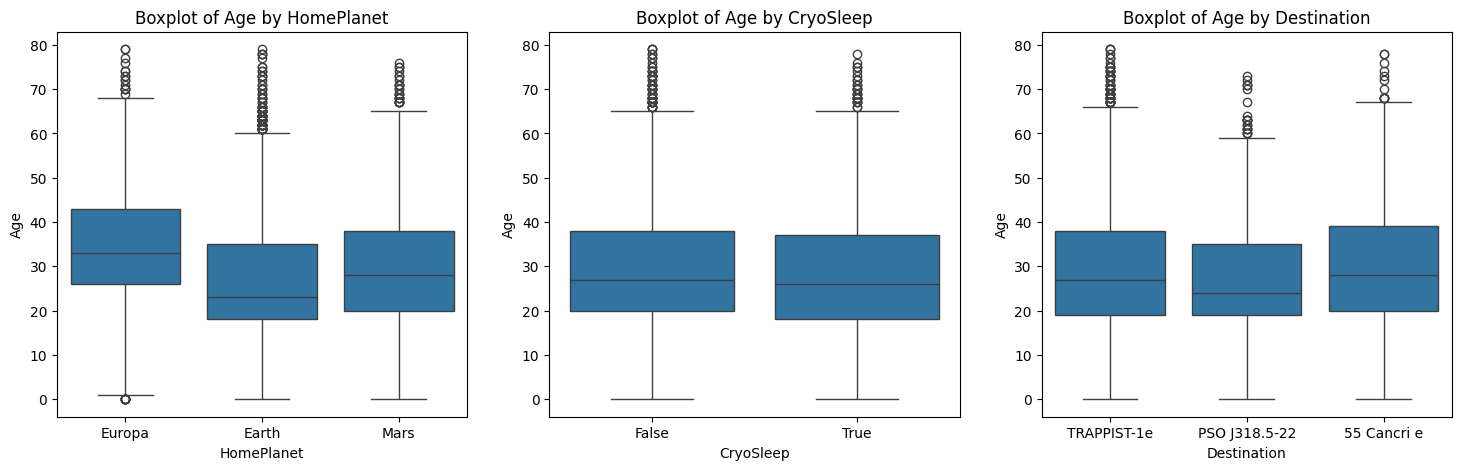

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot for Age by Gender
sns.boxplot(x='HomePlanet', y='Age', data=train_df_model1_main, ax=axes[0])
axes[0].set_title('Boxplot of Age by HomePlanet')

# Boxplot for Age by City
sns.boxplot(x='CryoSleep', y='Age', data=train_df_model1_main, ax=axes[1])
axes[1].set_title('Boxplot of Age by CryoSleep')

# Boxplot for Age by Occupation
sns.boxplot(x='Destination', y='Age', data=train_df_model1_main, ax=axes[2])
axes[2].set_title('Boxplot of Age by Destination')

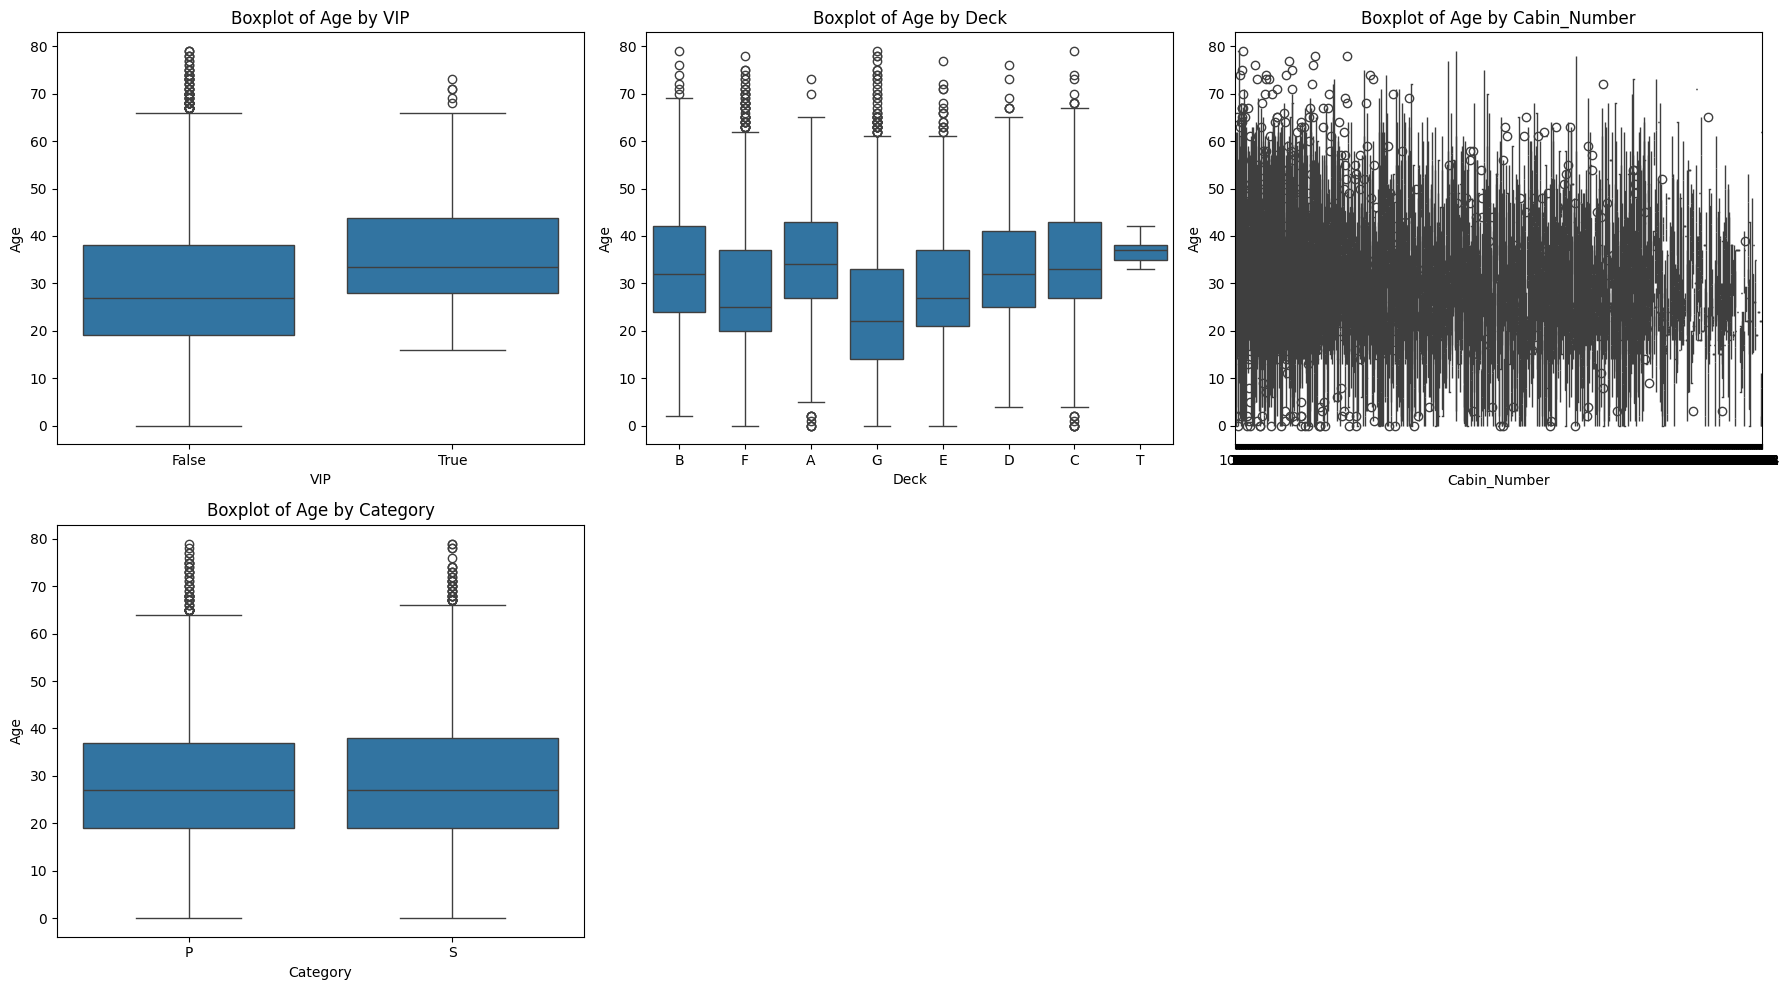

In [104]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjusted height for better visibility

# Boxplot for Age by VIP
sns.boxplot(x='VIP', y='Age', data=train_df_model1_main, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Age by VIP')

# Boxplot for Age by Deck
sns.boxplot(x='Deck', y='Age', data=train_df_model1_main, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Age by Deck')

# Boxplot for Age by Cabin_Number
sns.boxplot(x='Cabin_Number', y='Age', data=train_df_model1_main, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot of Age by Cabin_Number')

# Boxplot for Age by Category
sns.boxplot(x='Category', y='Age', data=train_df_model1_main, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Age by Category')

# Optionally, you can leave the last subplot empty or add another plot
axes[1, 1].axis('off')  # Turn off the unused subplot
axes[1, 2].axis('off')  # Turn off the unused subplot

# Adjust layout
plt.tight_layout()
plt.show()

In [105]:
# Step 1: Calculate the median age for each Deck in the training set
median_age_by_deck = train_df_model1_main.groupby('Deck')['Age'].median()
# Step 2: Fill missing values in Age for the training set
for deck, median_age in median_age_by_deck.items():
    train_df_model1_main.loc[(train_df_model1_main['Deck'] == deck) & (train_df_model1_main['Age'].isnull()), 'Age'] = median_age

# Step 3: Fill missing values in Age for the test set using the same median values
for deck, median_age in median_age_by_deck.items():
    test_df_model1_main.loc[(test_df_model1_main['Deck'] == deck) & (test_df_model1_main['Age'].isnull()), 'Age'] = median_age


In [106]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
RoomService,181,2.082135
PassengerId,0,0.000000
HomePlanet,0,0.000000
CryoSleep,0,0.000000
Destination,0,0.000000


In [107]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
FoodCourt,106,2.478373
Spa,101,2.361468
ShoppingMall,98,2.291326
Name,94,2.197802
RoomService,82,1.917232
VRDeck,80,1.870470
PassengerId,0,0.000000
HomePlanet,0,0.000000
CryoSleep,0,0.000000
Destination,0,0.000000


In [108]:
#Let's Analyse Foodcourt
FoodCourt_correlation = correlation_matrix['FoodCourt']

# Sort the correlations in descending order
sorted_foodcourt_correlation = FoodCourt_correlation.sort_values(ascending=False)
sorted_foodcourt_correlation

#Didn't find any proper relation

FoodCourt       1.000000
VRDeck          0.227995
Spa             0.221891
Age             0.130421
ShoppingMall   -0.014228
RoomService    -0.015889
Name: FoodCourt, dtype: float64

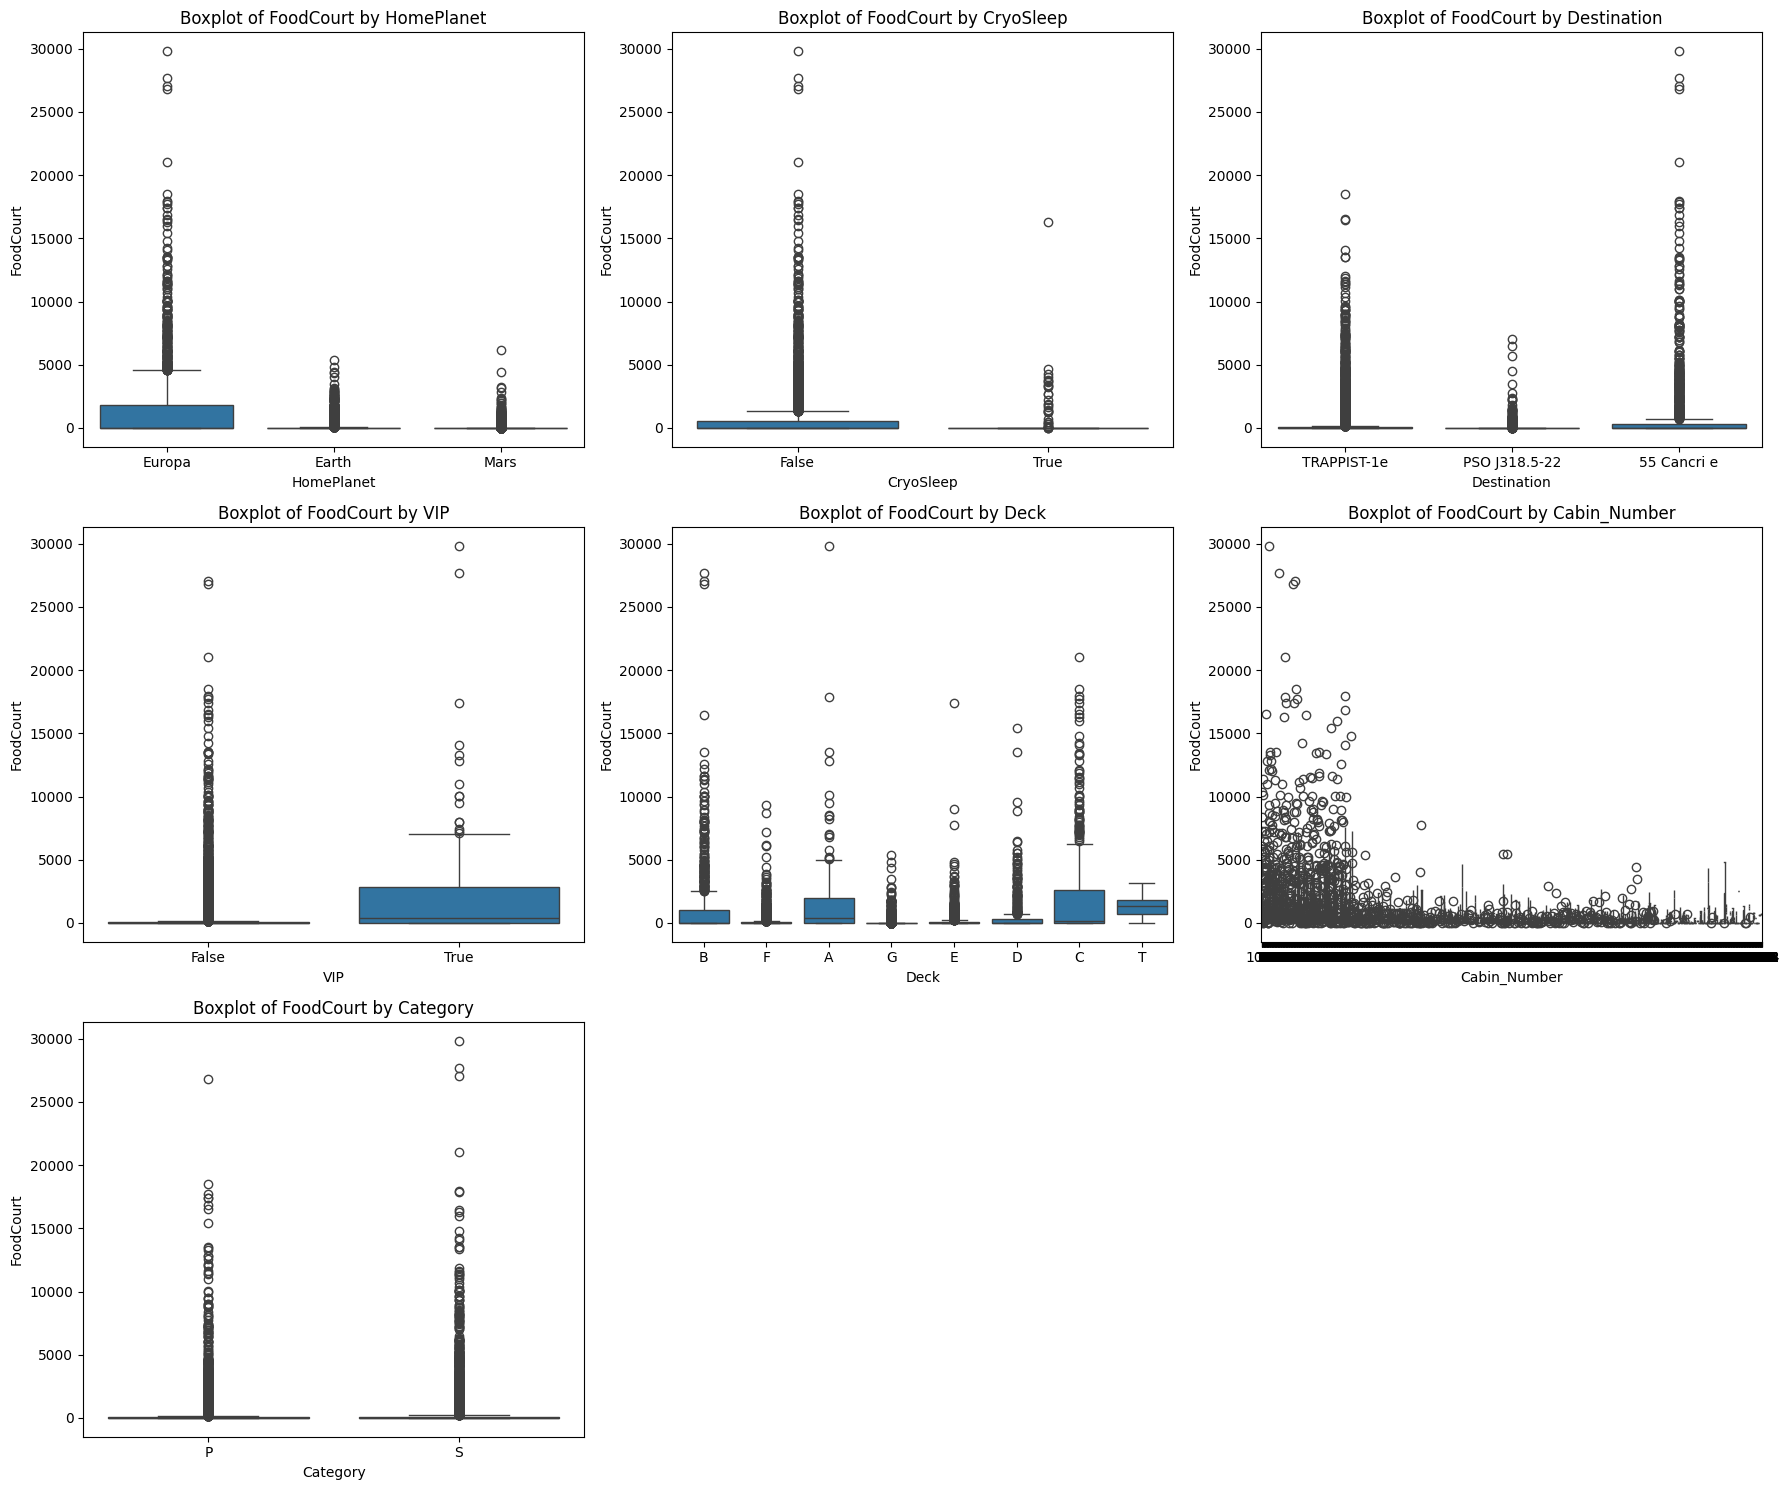

In [109]:
# Create a figure with a grid layout for all boxplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 rows and 3 columns

# List of features to compare against 'FoodCourt'
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_Number', 'Category']

# Loop through the features and create boxplots
for i, feature in enumerate(features):
    row = i // 3  # Calculate the row index
    col = i % 3  # Calculate the column index
    
    sns.boxplot(x=feature, y='FoodCourt', data=train_df_model1_main, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of FoodCourt by {feature}')

# Turn off unused subplots
for i in range(7, 9):
    row = i // 3
    col = i % 3
    axes[row, col].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [110]:
# Step 1: Calculate the median FoodCourt for each Deck in the training set
median_FoodCourt_by_deck = train_df_model1_main.groupby('Deck')['FoodCourt'].median()
# Step 2: Fill missing values in Age for the training set
for deck, median_FoodCourt in median_FoodCourt_by_deck.items():
    train_df_model1_main.loc[(train_df_model1_main['Deck'] == deck) & (train_df_model1_main['FoodCourt'].isnull()), 'FoodCourt'] = median_FoodCourt

# Step 3: Fill missing values in FoodCourt for the test set using the same median values
for deck, median_FoodCourt in median_FoodCourt_by_deck.items():
    test_df_model1_main.loc[(test_df_model1_main['Deck'] == deck) & (test_df_model1_main['FoodCourt'].isnull()), 'FoodCourt'] = median_FoodCourt


In [111]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
ShoppingMall,208,2.392730
Name,200,2.300702
VRDeck,188,2.162660
Spa,183,2.105142
RoomService,181,2.082135
PassengerId,0,0.000000
HomePlanet,0,0.000000
CryoSleep,0,0.000000
Destination,0,0.000000
Age,0,0.000000


In [112]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
Spa,101,2.361468
ShoppingMall,98,2.291326
Name,94,2.197802
RoomService,82,1.917232
VRDeck,80,1.870470
PassengerId,0,0.000000
HomePlanet,0,0.000000
CryoSleep,0,0.000000
Destination,0,0.000000
Age,0,0.000000


In [113]:
# Filling nulls for the remaining cols except Name

# Define the columns with missing values
columns_with_nulls = ['Spa', 'ShoppingMall', 'RoomService', 'VRDeck']

# Step 1: Calculate the median for each column by Deck in the training set
median_values_by_deck = {col: train_df_model1_main.groupby('Deck')[col].median() for col in columns_with_nulls}

# Step 2: Fill missing values in the training set
for col in columns_with_nulls:
    for deck, median_value in median_values_by_deck[col].items():
        train_df_model1_main.loc[(train_df_model1_main['Deck'] == deck) & (train_df_model1_main[col].isnull()), col] = median_value

# Step 3: Fill missing values in the test set using the same median values
for col in columns_with_nulls:
    for deck, median_value in median_values_by_deck[col].items():
        test_df_model1_main.loc[(test_df_model1_main['Deck'] == deck) & (test_df_model1_main[col].isnull()), col] = median_value

In [114]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
Name,200,2.300702
PassengerId,0,0.000000
HomePlanet,0,0.000000
CryoSleep,0,0.000000
Destination,0,0.000000
Age,0,0.000000
VIP,0,0.000000
RoomService,0,0.000000
FoodCourt,0,0.000000
ShoppingMall,0,0.000000


In [115]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
Name,94,2.197802
PassengerId,0,0.000000
HomePlanet,0,0.000000
CryoSleep,0,0.000000
Destination,0,0.000000
Age,0,0.000000
VIP,0,0.000000
RoomService,0,0.000000
FoodCourt,0,0.000000
ShoppingMall,0,0.000000


In [116]:
train_df_model1_main.head(20)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_Number,Category
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P


In [117]:
# # Assuming 'Name' is the column in your DataFrame containing names

# # Create a detector object
# train_df_model1_main['Name'] = train_df_model1_main['Name'].astype(str)

# # Create a detector object
# d = gender.Detector()

# # Function to get gender from name
# def get_gender(name):
#     first_name = name.split()[0]  # Extract the first name
#     return d.get_gender(first_name)

# # Apply the function to the 'Name' column
# train_df_model1_main['Gender'] = train_df_model1_main['Name'].apply(get_gender)



In [118]:
# train_df_model1_main['Gender'].value_counts()

In [119]:
#Analysing missing Name
train_df_model1_main.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_Number,Category
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [120]:
# name_counts_train = train_df_model1_main['Name'].value_counts()

In [121]:
train_df_model1_main=train_df_model1_main.drop('Name',axis=1)
test_df_model1_main=test_df_model1_main.drop('Name',axis=1)

In [122]:
null_check(train_df_model1_main)

,Null Count,Null Percentage (%)
PassengerId,0,0.0
HomePlanet,0,0.0
CryoSleep,0,0.0
Destination,0,0.0
Age,0,0.0
VIP,0,0.0
RoomService,0,0.0
FoodCourt,0,0.0
ShoppingMall,0,0.0
Spa,0,0.0


In [123]:
null_check(test_df_model1_main)

,Null Count,Null Percentage (%)
PassengerId,0,0.0
HomePlanet,0,0.0
CryoSleep,0,0.0
Destination,0,0.0
Age,0,0.0
VIP,0,0.0
RoomService,0,0.0
FoodCourt,0,0.0
ShoppingMall,0,0.0
Spa,0,0.0


In [124]:
continuous_cols = train_df_model1_main.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [125]:
continuous_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [126]:
X_train = train_df_model1_main[continuous_cols]
y_train = train_df_model1_main['Transported']
y_train = y_train.astype(int)

In [127]:
#Creating first model using only numerical cols.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [128]:
X_test = test_df_model1_main[continuous_cols]
y_pred = model.predict(X_test)


In [129]:
X_test.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0


In [130]:
test_df_model1_main.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_Number,Category
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [131]:
y_pred_model1=(y_pred>=0.5)

In [132]:
y_pred_model1

array([ True, False,  True, ...,  True,  True,  True])

In [133]:
submission_df_model1 = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_model1
})

submission_df_model1.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model1.csv',index=False)

In [134]:
#Now lets check skewness for the continuos features
X_train.skew()

Age              0.431343
RoomService      6.398083
FoodCourt        7.178037
ShoppingMall    12.763903
Spa              7.716470
VRDeck           7.904636
dtype: float64

In [135]:
X_test.skew()

Age             0.499379
RoomService     5.611631
FoodCourt       6.997731
ShoppingMall    6.902029
Spa             7.781516
VRDeck          8.465841
dtype: float64

In [136]:
X_train_skew_treated=X_train

In [137]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.779708,14.356191,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.078569,660.498283,0.0,0.0,0.0,42.0,14327.0
FoodCourt,8693.0,448.853963,1595.696563,0.0,0.0,0.0,69.0,29813.0
ShoppingMall,8693.0,169.576901,598.005874,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.595364,1125.560806,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.291096,1134.119038,0.0,0.0,0.0,40.0,24133.0


In [138]:
#Will use log first to treat skewness
X_train_log = X_train.copy()
X_test_log=X_test.copy()
epsilon = 1e-6  # or some other small value

for col in X_train_log.columns:
    if col!='Age':
        X_train_log[col] = np.sqrt(X_train_log[col] )
        X_test_log[col]=np.sqrt(X_test_log[col])

In [139]:
X_train_log.skew()

Age             0.431343
RoomService     2.378949
FoodCourt       2.941474
ShoppingMall    2.745264
Spa             3.059522
VRDeck          3.155201
dtype: float64

In [140]:
X_test_log.skew()

Age             0.499379
RoomService     2.198513
FoodCourt       2.910470
ShoppingMall    2.568323
Spa             3.091191
VRDeck          3.382924
dtype: float64

In [141]:
#This df used in model 3
X_train_log_model3_df=X_train_log.copy()
X_test_log_model3_df=X_test_log.copy()

In [142]:
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)


In [143]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_log.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_log.columns)

In [144]:
#Creating 2nd model after doing log and scaling
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_scaled, y_train)

y_pred2 = model2.predict(X_test_scaled)

y_pred_model2=(y_pred2>=0.5)


submission_df_model2 = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_model2
})

submission_df_model2.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model2.csv',index=False)
#This gives:- 0.78512

In [145]:
X_test_scaled.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.240506,0.000000,0.017375,0.000000,0.354939,0.000000
2,0.392405,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.481013,0.000000,0.472360,0.000000,0.089875,0.155694
4,0.253165,0.026419,0.000000,0.164409,0.000000,0.000000


In [146]:
#Creating 3rd model after doing log 
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train_log_model3_df, y_train)

y_pred3 = model3.predict(X_test_log_model3_df)

y_pred_model3=(y_pred3>=0.5)


submission_df_model3 = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_model3
})

submission_df_model3.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model3.csv',index=False)
#This is the best entry till now:- 0.78629

In [147]:
X_train_log_model3_df.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,24.0,10.440307,3.000000,5.000000,23.430749,6.633250
2,58.0,6.557439,59.799666,0.000000,81.945104,7.000000
3,33.0,0.000000,35.818989,19.261360,57.697487,13.892444
4,16.0,17.406895,8.366600,12.288206,23.769729,1.414214


In [148]:
# Assuming train_df_model1_main is your DataFrame
numeric_features_df = train_df_model1_main.select_dtypes(include=['int64', 'float64'])

# If you want to see which columns were selected
print(numeric_features_df.columns)


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [149]:
train_df_model1_main.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Deck', 'Cabin_Number', 'Category'],
      dtype='object')

In [150]:
#L2 regularization

#Creating 2nd model after doing log and scaling
model2 = LogisticRegression(max_iter=1000,C=10)
model2.fit(X_train_scaled, y_train)

y_pred2 = model2.predict(X_test_scaled)

y_pred_model2=(y_pred2>=0.5)


submission_df_model2 = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_model2
})

submission_df_model2.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model2_l2_C_10.csv',index=False)

#Best till now:0.78700

In [151]:
#Creating 3rd model after doing log 
model3 = LogisticRegression(max_iter=1000,C=10)
model3.fit(X_train_log_model3_df, y_train)

y_pred3 = model3.predict(X_test_log_model3_df)

y_pred_model3=(y_pred3>=0.5)


submission_df_model3 = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_model3
})

submission_df_model3.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model3_l2_C_10.csv.csv',index=False)


In [152]:
X_train_scaled.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.303797,0.087224,0.017375,0.032622,0.156525,0.042699
2,0.734177,0.054784,0.346335,0.000000,0.547421,0.045060
3,0.417722,0.000000,0.207449,0.125669,0.385439,0.089428
4,0.202532,0.145427,0.048456,0.080173,0.158790,0.009104


In [153]:
correlation_matrix_X_train_scaled = X_train_scaled.corr()

In [154]:
correlation_matrix_X_train_scaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.099435,0.179803,0.069645,0.163714,0.141799
RoomService,0.099435,1.000000,-0.014188,0.188064,0.020875,-0.006851
FoodCourt,0.179803,-0.014188,1.000000,0.001315,0.343647,0.367532
ShoppingMall,0.069645,0.188064,0.001315,1.000000,0.035917,-0.002279
Spa,0.163714,0.020875,0.343647,0.035917,1.000000,0.267103
VRDeck,0.141799,-0.006851,0.367532,-0.002279,0.267103,1.000000


In [155]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [156]:
#Checking feature importance
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [157]:
feature_importances_df

,Feature,Importance
1,RoomService,0.205939
4,Spa,0.196733
5,VRDeck,0.181332
2,FoodCourt,0.160343
3,ShoppingMall,0.138272
0,Age,0.117381


In [158]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [159]:
#Lets create a feature with all the numeric features added up as expense

X_train_log_model_4 = X_train.copy()
X_test_log_model_4=X_test.copy()


In [160]:
X_train_log_model_4.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [161]:
X_train_log_model_4['total_expense'] = (
    X_train_log_model_4['RoomService'] +
    X_train_log_model_4['FoodCourt'] +
    X_train_log_model_4['ShoppingMall'] +
    X_train_log_model_4['Spa'] +
    X_train_log_model_4['VRDeck']
)

X_train_log_model_4['Luxury_Expense']=X_train_log_model_4['VRDeck']+X_train_log_model_4['Spa']
X_train_log_model_4['Basic_Expense']=X_train_log_model_4['RoomService']+X_train_log_model_4['FoodCourt']+X_train_log_model_4['ShoppingMall']

# Display the updated DataFrame
print(X_train_log_model_4.head())

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  total_expense  \
0  39.0          0.0        0.0           0.0     0.0     0.0            0.0   
1  24.0        109.0        9.0          25.0   549.0    44.0          736.0   
2  58.0         43.0     3576.0           0.0  6715.0    49.0        10383.0   
3  33.0          0.0     1283.0         371.0  3329.0   193.0         5176.0   
4  16.0        303.0       70.0         151.0   565.0     2.0         1091.0   

   Luxury_Expense  Basic_Expense  
0             0.0            0.0  
1           593.0          143.0  
2          6764.0         3619.0  
3          3522.0         1654.0  
4           567.0          524.0  


In [162]:
X_test_log_model_4['total_expense'] = (
    X_test_log_model_4['RoomService'] +
    X_test_log_model_4['FoodCourt'] +
    X_test_log_model_4['ShoppingMall'] +
    X_test_log_model_4['Spa'] +
    X_test_log_model_4['VRDeck']
)

X_test_log_model_4['Luxury_Expense']=X_test_log_model_4['VRDeck']+X_test_log_model_4['Spa']
X_test_log_model_4['Basic_Expense']=X_test_log_model_4['RoomService']+X_test_log_model_4['FoodCourt']+X_test_log_model_4['ShoppingMall']

# Display the updated DataFrame
print(X_test_log_model_4.head())

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  total_expense  \
0  27.0          0.0        0.0           0.0     0.0     0.0            0.0   
1  19.0          0.0        9.0           0.0  2823.0     0.0         2832.0   
2  31.0          0.0        0.0           0.0     0.0     0.0            0.0   
3  38.0          0.0     6652.0           0.0   181.0   585.0         7418.0   
4  20.0         10.0        0.0         635.0     0.0     0.0          645.0   

   Luxury_Expense  Basic_Expense  
0             0.0            0.0  
1          2823.0            9.0  
2             0.0            0.0  
3           766.0         6652.0  
4             0.0          645.0  


In [163]:
X_train_log_model_4.skew()



Age                0.431343
RoomService        6.398083
FoodCourt          7.178037
ShoppingMall      12.763903
Spa                7.716470
VRDeck             7.904636
total_expense      4.417387
Luxury_Expense     5.737282
Basic_Expense      5.436854
dtype: float64

In [164]:
X_test_log_model_4.skew()

Age               0.499379
RoomService       5.611631
FoodCourt         6.997731
ShoppingMall      6.902029
Spa               7.781516
VRDeck            8.465841
total_expense     4.810021
Luxury_Expense    5.846298
Basic_Expense     5.251715
dtype: float64

In [165]:
scaler = MinMaxScaler()
X_train_scaled_model4_scaled = scaler.fit_transform(X_train_log_model_4)
X_test_scaled_model4_scaled = scaler.transform(X_test_log_model_4)

In [166]:
X_train_scaled_model4 = pd.DataFrame(X_train_scaled_model4_scaled, columns=X_train_log_model_4.columns)
X_test_scaled_model4 = pd.DataFrame(X_test_scaled_model4_scaled, columns=X_test_log_model_4.columns)

In [167]:
X_train_log.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [168]:
#model 4
#Creating 2nd model after doing log and scaling
model4 = LogisticRegression(max_iter=1000,C=10)
model4.fit(X_train_log_model_4, y_train)

y_pred4 = model4.predict(X_test_log_model_4)

y_pred_model4=(y_pred4>=0.5)


submission_df_model4 = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_model4
})

submission_df_model4.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model4_C_10.csv',index=False)



In [169]:
X_train_scaled_model4_corr=X_train_scaled_model4.corr()
X_train_scaled_model4_corr

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_expense,Luxury_Expense,Basic_Expense
Age,1.000000,0.068780,0.129087,0.033309,0.122603,0.100860,0.186836,0.147441,0.148842
RoomService,0.068780,1.000000,-0.015194,0.052405,0.009232,-0.018636,0.234330,-0.006277,0.366213
FoodCourt,0.129087,-0.015194,1.000000,-0.013788,0.221487,0.224797,0.742633,0.294576,0.865306
ShoppingMall,0.033309,0.052405,-0.013788,1.000000,0.014543,-0.007855,0.220499,0.004358,0.334960
Spa,0.122603,0.009232,0.221487,0.014543,1.000000,0.147671,0.592654,0.755384,0.201991
VRDeck,0.100860,-0.018636,0.224797,-0.007855,0.147671,1.000000,0.585796,0.759646,0.187443
total_expense,0.186836,0.234330,0.742633,0.220499,0.592654,0.585796,1.000000,0.777814,0.807288
Luxury_Expense,0.147441,-0.006277,0.294576,0.004358,0.755384,0.759646,0.777814,1.000000,0.257008
Basic_Expense,0.148842,0.366213,0.865306,0.334960,0.201991,0.187443,0.807288,0.257008,1.000000


In [170]:
#Creating ratios like Spa/Total_expense etc.
X_train_scaled_model4.head(5)#Create model with this and X_test_scaled_model4

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_expense,Luxury_Expense,Basic_Expense
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,0.020452,0.020734,0.004797
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.288521,0.236503,0.121390
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.143830,0.123147,0.055479
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,0.030317,0.019825,0.017576


In [171]:
#model 4 with scaled and total_expense
#Creating 2nd model after doing log and scaling
model4_total_expense = LogisticRegression(max_iter=1000,C=10)
model4_total_expense.fit(X_train_scaled_model4, y_train)

y_pred4_total_expense = model4_total_expense.predict(X_test_scaled_model4)

y_pred_model4_total_expense_class=(y_pred4_total_expense>=0.5)


submission_df_model4_total_expense = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_model4_total_expense_class
})

submission_df_model4_total_expense.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model4_total_expense_class_pen_C10.csv',index=False)



In [172]:
X_train_scaled_model4_with_ratios = X_train_scaled_model4.copy()
X_train_scaled_model4_with_ratios['Spa_Ratio'] = X_train_scaled_model4['Spa'] / X_train_scaled_model4['total_expense']
X_train_scaled_model4_with_ratios['RoomService_Ratio'] = X_train_scaled_model4['RoomService'] / X_train_scaled_model4['total_expense']
X_train_scaled_model4_with_ratios['FoodCourt_Ratio'] = X_train_scaled_model4['FoodCourt'] / X_train_scaled_model4['total_expense']
X_train_scaled_model4_with_ratios['ShoppingMall_Ratio'] = X_train_scaled_model4['ShoppingMall'] / X_train_scaled_model4['total_expense']
X_train_scaled_model4_with_ratios['VRDeck_Ratio'] = X_train_scaled_model4['VRDeck'] / X_train_scaled_model4['total_expense']

# Handle division by zero or very small numbers to avoid NaN or infinity
X_train_scaled_model4_with_ratios = X_train_scaled_model4_with_ratios.replace([np.inf, -np.inf], np.nan).fillna(0)

# Check the first few rows to see the new columns


In [173]:
X_train_scaled_model4_with_ratios.head(5) #Create model with this and X_test_scaled_model4_with_ratios

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_expense,Luxury_Expense,Basic_Expense,Spa_Ratio,RoomService_Ratio,FoodCourt_Ratio,ShoppingMall_Ratio,VRDeck_Ratio
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,0.020452,0.020734,0.004797,1.197946,0.371997,0.014761,0.052034,0.089148
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.288521,0.236503,0.121390,1.038642,0.010402,0.415733,0.000000,0.007037
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.143830,0.123147,0.055479,1.032909,0.000000,0.299207,0.109801,0.055603
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,0.030317,0.019825,0.017576,0.831699,0.697603,0.077449,0.212020,0.002734


In [174]:
X_test_scaled_model4_with_ratios = X_test_scaled_model4.copy()

# Create ratio columns for the test set
X_test_scaled_model4_with_ratios['Spa_Ratio'] = X_test_scaled_model4['Spa'] / X_test_scaled_model4['total_expense']
X_test_scaled_model4_with_ratios['RoomService_Ratio'] = X_test_scaled_model4['RoomService'] / X_test_scaled_model4['total_expense']
X_test_scaled_model4_with_ratios['FoodCourt_Ratio'] = X_test_scaled_model4['FoodCourt'] / X_test_scaled_model4['total_expense']
X_test_scaled_model4_with_ratios['ShoppingMall_Ratio'] = X_test_scaled_model4['ShoppingMall'] / X_test_scaled_model4['total_expense']
X_test_scaled_model4_with_ratios['VRDeck_Ratio'] = X_test_scaled_model4['VRDeck'] / X_test_scaled_model4['total_expense']

# Handle division by zero or very small numbers to avoid NaN or infinity
X_test_scaled_model4_with_ratios = X_test_scaled_model4_with_ratios.replace([np.inf, -np.inf], np.nan).fillna(0)



In [175]:
#model 4 with scaled and total_expense
#Creating 2nd model after doing log and scaling
model4_ratio = LogisticRegression(max_iter=1000,C=10)
model4_ratio.fit(X_train_scaled_model4_with_ratios, y_train)

y_pred4_ratio = model4_ratio.predict(X_test_scaled_model4_with_ratios)

y_pred4_ratio_class=(y_pred4_ratio>=0.5)


submission_df_model4_ratio = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred4_ratio_class
})

submission_df_model4_ratio.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model4_ratio_class_pen_C10.csv',index=False)


#Best till now:-  0.79097

In [176]:
#model 4 with luxury and basic spend
#Creating 2nd model after doing log and scaling
model4_lux_bas = LogisticRegression(max_iter=1000,C=10)
model4_lux_bas.fit(X_train_scaled_model4_with_ratios, y_train)

y_pred4_ratio_lux_bas = model4_lux_bas.predict(X_test_scaled_model4_with_ratios)

y_pred4_ratio_class_lux_bas=(y_pred4_ratio_lux_bas>=0.5)


submission_df_model4_ratio_lux_bas = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred4_ratio_class_lux_bas
})

submission_df_model4_ratio_lux_bas.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model4_luxury_basic.csv',index=False)




In [177]:
X_train_scaled_model4_with_ratios.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_expense,Luxury_Expense,Basic_Expense,Spa_Ratio,RoomService_Ratio,FoodCourt_Ratio,ShoppingMall_Ratio,VRDeck_Ratio
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,0.020452,0.020734,0.004797,1.197946,0.371997,0.014761,0.052034,0.089148
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.288521,0.236503,0.121390,1.038642,0.010402,0.415733,0.000000,0.007037
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.143830,0.123147,0.055479,1.032909,0.000000,0.299207,0.109801,0.055603
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,0.030317,0.019825,0.017576,0.831699,0.697603,0.077449,0.212020,0.002734


In [178]:
X_train_scaled_model4_with_ratios.shape

(8693, 14)

In [179]:
X_test_scaled_model4_with_ratios.shape

(4277, 14)

In [180]:
#Checking feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)  # or RandomForestRegressor
model.fit(X_train_scaled_model4_with_ratios, y_train)
feature_importances = model.feature_importances_
feature_names = X_train_scaled_model4_with_ratios.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
6,total_expense,0.144856
7,Luxury_Expense,0.121531
8,Basic_Expense,0.115877
11,FoodCourt_Ratio,0.079197
1,RoomService,0.073349
10,RoomService_Ratio,0.071120
0,Age,0.064590
9,Spa_Ratio,0.058801
13,VRDeck_Ratio,0.052927
12,ShoppingMall_Ratio,0.050435


In [181]:
X_train_scaled_model4_with_ratios.skew()

Age                    0.431343
RoomService            6.398083
FoodCourt              7.178037
ShoppingMall          12.763903
Spa                    7.716470
VRDeck                 7.904636
total_expense          4.417387
Luxury_Expense         5.737282
Basic_Expense          5.436854
Spa_Ratio              2.401468
RoomService_Ratio      2.130728
FoodCourt_Ratio        2.126613
ShoppingMall_Ratio     2.460403
VRDeck_Ratio           2.492258
dtype: float64

In [182]:
X_test_scaled_model4_with_ratios.skew()

Age                   0.499379
RoomService           5.611631
FoodCourt             6.997731
ShoppingMall          6.902029
Spa                   7.781516
VRDeck                8.465841
total_expense         4.810021
Luxury_Expense        5.846298
Basic_Expense         5.251715
Spa_Ratio             2.372019
RoomService_Ratio     2.107359
FoodCourt_Ratio       2.151719
ShoppingMall_Ratio    2.509142
VRDeck_Ratio          2.512848
dtype: float64

In [183]:
df_transformed_model4_train_ratio_scaled_feat = X_train_scaled_model4_with_ratios.copy()
df_transformed_model4_test_ratio_scaled_feat = X_test_scaled_model4_with_ratios.copy()

# List of features to transform, excluding 'Age'
features_to_transform = [
    'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 
    'total_expense', 'Luxury_Expense', 'Basic_Expense', 
    'Spa_Ratio', 'RoomService_Ratio', 'FoodCourt_Ratio', 
    'ShoppingMall_Ratio', 'VRDeck_Ratio'
]

# Apply np.log1p to the specified features
for feature in features_to_transform:
    df_transformed_model4_train_ratio_scaled_feat[feature] = np.sqrt(df_transformed_model4_train_ratio_scaled_feat[feature])
    df_transformed_model4_test_ratio_scaled_feat[feature] = np.sqrt(df_transformed_model4_test_ratio_scaled_feat[feature])
    

# Check the new skewness values
skewness_after_transformation_train = df_transformed_model4_train_ratio_scaled_feat[features_to_transform].skew()
skewness_after_transformation_test = df_transformed_model4_test_ratio_scaled_feat[features_to_transform].skew()
print("Skewness after transformation:\n", skewness_after_transformation_train)
print('\n')
print("Skewness after transformation:\n", skewness_after_transformation_test)

Skewness after transformation:
 RoomService           2.378949
FoodCourt             2.941474
ShoppingMall          2.745264
Spa                   3.059522
VRDeck                3.155201
total_expense         1.331877
Luxury_Expense        2.265238
Basic_Expense         1.537973
Spa_Ratio             1.758687
RoomService_Ratio     1.637545
FoodCourt_Ratio       1.588300
ShoppingMall_Ratio    1.870186
VRDeck_Ratio          1.828234
dtype: float64


Skewness after transformation:
 RoomService           2.198513
FoodCourt             2.910470
ShoppingMall          2.568323
Spa                   3.091191
VRDeck                3.382924
total_expense         1.373740
Luxury_Expense        2.372682
Basic_Expense         1.463852
Spa_Ratio             1.750025
RoomService_Ratio     1.635035
FoodCourt_Ratio       1.608913
ShoppingMall_Ratio    1.871795
VRDeck_Ratio          1.866288
dtype: float64


In [184]:
#Testing model 4-Treated all for skewness with sqrt
model4_test1 = LogisticRegression(max_iter=1000,C=10)
model4_test1.fit(df_transformed_model4_train_ratio_scaled_feat, y_train)

y_pred4_test1 = model4_test1.predict(df_transformed_model4_test_ratio_scaled_feat)

y_pred4_test1_class=(y_pred4_test1>=0.5)


submission_df_model4_test1 = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred4_test1_class
})

submission_df_model4_test1.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model4_Test1_skew_treat_sqrt.csv',index=False)

#Best till now:- 0.79682


In [185]:
#Benchmarking model

# Initialize the model
model = LogisticRegression(max_iter=1000,C=10)

# Perform K-Fold Cross-Validation (e.g., with 5 folds)
cv_scores = cross_val_score(model, df_transformed_model4_train_ratio_scaled_feat, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")

Cross-Validation Scores: [0.79010926 0.77228292 0.78838413 0.80494822 0.80552359]
Mean Accuracy: 79.22%
Standard Deviation: 1.23%


In [186]:
df_transformed_model4_train_ratio_scaled_feat.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_expense,Luxury_Expense,Basic_Expense,Spa_Ratio,RoomService_Ratio,FoodCourt_Ratio,ShoppingMall_Ratio,VRDeck_Ratio
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.303797,0.087224,0.017375,0.032622,0.156525,0.042699,0.143010,0.143994,0.069257,1.094507,0.609915,0.121493,0.228110,0.298576
2,0.734177,0.054784,0.346335,0.000000,0.547421,0.045060,0.537141,0.486316,0.348411,1.019138,0.101992,0.644774,0.000000,0.083889
3,0.417722,0.000000,0.207449,0.125669,0.385439,0.089428,0.379249,0.350923,0.235540,1.016321,0.000000,0.546999,0.331362,0.235803
4,0.202532,0.145427,0.048456,0.080173,0.158790,0.009104,0.174116,0.140802,0.132575,0.911975,0.835226,0.278296,0.460457,0.052284


## DecisionTreeClassifier

In [187]:
#Try other models tommorow



model = DecisionTreeClassifier(max_depth=5,min_samples_split=8,criterion='gini')
cv_scores = cross_val_score(model, df_transformed_model4_train_ratio_scaled_feat, y_train, cv=5, scoring='accuracy')
print('min_samples_leaf',i)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")


#78.88%

min_samples_leaf 8
Cross-Validation Scores: [0.7826337  0.77055779 0.78838413 0.80207135 0.80034522]
Mean Accuracy: 78.88%
Standard Deviation: 1.17%


## RandomForestClassifier

In [188]:

model = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=8, min_samples_leaf=8, max_features='log2')
cv_scores = cross_val_score(model, df_transformed_model4_train_ratio_scaled_feat, y_train, cv=5, scoring='accuracy')

# Assuming 'i' is defined somewhere before this print statement
print('min_samples_leaf', i)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")


# 79.56%

min_samples_leaf 8
Cross-Validation Scores: [0.79010926 0.77803335 0.78723404 0.81127733 0.80034522]
Mean Accuracy: 79.34%
Standard Deviation: 1.14%


## GradientBoostingClassifier

In [189]:



model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,max_depth=4,min_samples_split=6,subsample=0.4,max_features='log2')
cv_scores = cross_val_score(model, df_transformed_model4_train_ratio_scaled_feat, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")


# Cross-Validation Scores: [0.78838413 0.77630822 0.78953422 0.81588032 0.80034522]
# Mean Accuracy: 79.41%
# Standard Deviation: 1.33%

Cross-Validation Scores: [0.78953422 0.78493387 0.79010926 0.80494822 0.79919448]
Mean Accuracy: 79.37%
Standard Deviation: 0.73%


## SVC

In [190]:




model = SVC(C=100,kernel='linear')
cv_scores = cross_val_score(model, df_transformed_model4_train_ratio_scaled_feat, y_train, cv=5, scoring='accuracy',n_jobs=-1)
print('probability',i)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")

#79.29%

probability 8
Cross-Validation Scores: [0.78953422 0.77343301 0.78953422 0.80840046 0.80379747]
Mean Accuracy: 79.29%
Standard Deviation: 1.23%


## KNeighborsClassifier

In [191]:
model = KNeighborsClassifier(n_neighbors=19,weights='distance',metric='manhattan')
cv_scores = cross_val_score(model, df_transformed_model4_train_ratio_scaled_feat, y_train, cv=5, scoring='accuracy')
print('metric',i)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")

#Mean Accuracy: 78.58%

metric 8
Cross-Validation Scores: [0.77400805 0.77343301 0.77803335 0.80034522 0.80322209]
Mean Accuracy: 78.58%
Standard Deviation: 1.32%


In [192]:
model = MLPClassifier(hidden_layer_sizes=(100,),solver='adam',alpha=0.001)
cv_scores = cross_val_score(model, df_transformed_model4_train_ratio_scaled_feat, y_train, cv=5, scoring='accuracy')
print('learning_rate_init',i)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")

# param_grid = {
#     'hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],  # Corrected from 'solver:'
#     'alpha': [0.000, 0.001, 0.01],
#     'learning_rate': ['constant', 'adaptive'],  # Corrected from 'learning'
#     'max_iter': [200, 500],
#     'learning_rate_init': [0.001, 0.01]  # Corrected from '_rate_init'
# }


#Mean Accuracy: 79.37%

/home/anuragverma/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


learning_rate_init 8
Cross-Validation Scores: [0.79125934 0.77688327 0.78435883 0.80667434 0.80379747]
Mean Accuracy: 79.26%
Standard Deviation: 1.13%


## RF model- 0.79892

In [193]:
#Creating Random_forest model_



model4_rf = RandomForestClassifier(n_estimators=100,max_depth=7,min_samples_split=8,min_samples_leaf=8,max_features='log2')

model4_rf.fit(df_transformed_model4_train_ratio_scaled_feat, y_train)

y_pred4_test4 = model4_rf.predict(df_transformed_model4_test_ratio_scaled_feat)

y_pred4_test14class=(y_pred4_test4>=0.5)


submission_df_model4_rf = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred4_test14class
})

submission_df_model4_rf.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model4_rf.csv',index=False)

#Best till now--Score: 0.79892

In [194]:
#Creating neural network

X_train = df_transformed_model4_train_ratio_scaled_feat.values
y_train_neural = y_train.values
X_test = df_transformed_model4_test_ratio_scaled_feat.values

## NN -1

In [195]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=50,  # Adjust based on your needs
                    batch_size=32,
                    validation_split=0.2,  # Use part of the training data for validation
                    verbose=1)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_pred_classes=(y_pred_classes>=0.5)

submission_d_model4_nn = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_classes
})

submission_d_model4_nn.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model4_nn.csv',index=False)

#Best -0.79939


Epoch 1/50


/home/anuragverma/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724088543.362623   10696 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-19 22:59:03.399988: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platfor

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6876 - loss: 0.6098 - val_accuracy: 0.7987 - val_loss: 0.4795
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7857 - loss: 0.5156 - val_accuracy: 0.7987 - val_loss: 0.4834
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7850 - loss: 0.5080 - val_accuracy: 0.7970 - val_loss: 0.4720
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7944 - loss: 0.4919 - val_accuracy: 0.7987 - val_loss: 0.4780
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7757 - loss: 0.5112 - val_accuracy: 0.8016 - val_loss: 0.4720
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7820 - loss: 0.5073 - val_accuracy: 0.7964 - val_loss: 0.4763
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7852 - loss: 0.5003 - val_accuracy: 0.8005 - val_loss: 0.4671
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7877 - loss: 0.4942 - val_accuracy: 0.7993 - val_

## Best numeric df- df_transformed_model4_test_ratio_scaled_feat, df_transformed_model4_train_ratio_scaled_feat, y_train
## Now lets start to work with cat cols too

In [196]:
train_df_model1_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Cabin_Number  8693 non-null   object 
 14  Category      8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [197]:
# Assuming train_df_model1_main and df_transformed_model4_test_ratio_scaled_feat are already defined

# List of categorical columns to add
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_Number', 'Category']

# Select only the categorical columns from train_df_model1_main
categorical_data_train_df = train_df_model1_main[categorical_columns].copy()
categorical_data_test_df = test_df_model1_main[categorical_columns].copy()

# Add these categorical columns to df_transformed_model4_test_ratio_scaled_feat
df_transformed_model4_train_ratio_scaled_feat = pd.concat([df_transformed_model4_train_ratio_scaled_feat, categorical_data_train_df], axis=1)
df_transformed_model4_test_ratio_scaled_feat = pd.concat([df_transformed_model4_test_ratio_scaled_feat, categorical_data_test_df], axis=1)

# Optionally, check the new dataframe to ensure the columns have been added correctly
print(df_transformed_model4_test_ratio_scaled_feat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4277 non-null   float64
 1   RoomService         4277 non-null   float64
 2   FoodCourt           4277 non-null   float64
 3   ShoppingMall        4277 non-null   float64
 4   Spa                 4277 non-null   float64
 5   VRDeck              4277 non-null   float64
 6   total_expense       4277 non-null   float64
 7   Luxury_Expense      4277 non-null   float64
 8   Basic_Expense       4277 non-null   float64
 9   Spa_Ratio           4277 non-null   float64
 10  RoomService_Ratio   4277 non-null   float64
 11  FoodCourt_Ratio     4277 non-null   float64
 12  ShoppingMall_Ratio  4277 non-null   float64
 13  VRDeck_Ratio        4277 non-null   float64
 14  HomePlanet          4277 non-null   object 
 15  CryoSleep           4277 non-null   object 
 16  Destin

In [198]:
df_transformed_model4_test_ratio_scaled_feat.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_expense,Luxury_Expense,Basic_Expense,Spa_Ratio,...,FoodCourt_Ratio,ShoppingMall_Ratio,VRDeck_Ratio,HomePlanet,CryoSleep,Destination,VIP,Deck,Cabin_Number,Category
0,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,Earth,True,TRAPPIST-1e,False,G,3,S
1,0.240506,0.000000,0.017375,0.000000,0.354939,0.000000,0.280526,0.314176,0.017375,1.265261,...,0.061936,0.000000,0.000000,Earth,False,TRAPPIST-1e,False,F,4,S
2,0.392405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,Europa,True,55 Cancri e,False,C,0,S
3,0.481013,0.000000,0.472360,0.000000,0.089875,0.155694,0.454015,0.163656,0.472360,0.197955,...,1.040406,0.000000,0.342927,Europa,False,TRAPPIST-1e,False,C,1,S
4,0.253165,0.026419,0.000000,0.164409,0.000000,0.000000,0.133877,0.000000,0.147088,0.000000,...,0.000000,1.228061,0.000000,Earth,False,TRAPPIST-1e,False,F,5,S


In [199]:
df_transformed_model4_train_ratio_scaled_feat

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_expense,Luxury_Expense,Basic_Expense,Spa_Ratio,...,FoodCourt_Ratio,ShoppingMall_Ratio,VRDeck_Ratio,HomePlanet,CryoSleep,Destination,VIP,Deck,Cabin_Number,Category
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,Europa,False,TRAPPIST-1e,False,B,0,P
1,0.303797,0.087224,0.017375,0.032622,0.156525,0.042699,0.143010,0.143994,0.069257,1.094507,...,0.121493,0.228110,0.298576,Earth,False,TRAPPIST-1e,False,F,0,S
2,0.734177,0.054784,0.346335,0.000000,0.547421,0.045060,0.537141,0.486316,0.348411,1.019138,...,0.644774,0.000000,0.083889,Europa,False,TRAPPIST-1e,True,A,0,S
3,0.417722,0.000000,0.207449,0.125669,0.385439,0.089428,0.379249,0.350923,0.235540,1.016321,...,0.546999,0.331362,0.235803,Europa,False,TRAPPIST-1e,False,A,0,S
4,0.202532,0.145427,0.048456,0.080173,0.158790,0.009104,0.174116,0.140802,0.132575,0.911975,...,0.278296,0.460457,0.052284,Earth,False,TRAPPIST-1e,False,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.518987,0.000000,0.478253,0.000000,0.270780,0.055375,0.487029,0.245020,0.478253,0.555985,...,0.981981,0.000000,0.113699,Europa,False,55 Cancri e,True,A,98,P
8689,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,Earth,True,PSO J318.5-22,False,G,1499,S
8690,0.329114,0.000000,0.000000,0.282288,0.006680,0.000000,0.228137,0.005913,0.250582,0.029282,...,0.000000,1.237362,0.000000,Earth,False,TRAPPIST-1e,False,G,1500,S
8691,0.405063,0.000000,0.187579,0.000000,0.125512,0.366127,0.358960,0.354196,0.187579,0.349655,...,0.522564,0.000000,1.019966,Europa,False,55 Cancri e,False,E,608,S


## df_transformed_model4_train_ratio_scaled_feat and df_transformed_model4_test_ratio_scaled_feat and y_train has combined cat and numerical

In [200]:
for i in categorical_columns:
    
    print(f'col name is {i}',df_transformed_model4_train_ratio_scaled_feat[i].unique())

col name is HomePlanet ['Europa' 'Earth' 'Mars']
col name is CryoSleep [False True]
col name is Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
col name is VIP [False True]
col name is Deck ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
col name is Cabin_Number ['0' '1' '2' ... '1892' '1893' '1894']
col name is Category ['P' 'S']


In [201]:
train_df_model1_main['VIP'].unique()

array([False, True], dtype=object)

In [202]:
print(df_transformed_model4_train_ratio_scaled_feat['VIP'].value_counts())
print(df_transformed_model4_train_ratio_scaled_feat['CryoSleep'].value_counts())

VIP
False    8486
True      207
Name: count, dtype: int64
CryoSleep
False    5552
True     3141
Name: count, dtype: int64


In [203]:
# Assuming df_transformed_model4_train_ratio_scaled_feat is already defined

# Convert True to 1 and False to 0 in the 'VIP' column
df_transformed_model4_train_ratio_scaled_feat['VIP'] = df_transformed_model4_train_ratio_scaled_feat['VIP'].astype(int)
df_transformed_model4_train_ratio_scaled_feat['CryoSleep'] = df_transformed_model4_train_ratio_scaled_feat['CryoSleep'].astype(int)

df_transformed_model4_test_ratio_scaled_feat['VIP'] = df_transformed_model4_test_ratio_scaled_feat['VIP'].astype(int)
df_transformed_model4_test_ratio_scaled_feat['CryoSleep'] = df_transformed_model4_test_ratio_scaled_feat['CryoSleep'].astype(int)

# Optionally, verify the conversion
print(df_transformed_model4_train_ratio_scaled_feat['VIP'].value_counts())
print(df_transformed_model4_train_ratio_scaled_feat['CryoSleep'].value_counts())
print('\n')
print(df_transformed_model4_test_ratio_scaled_feat['VIP'].value_counts())
print(df_transformed_model4_test_ratio_scaled_feat['CryoSleep'].value_counts())

VIP
0    8486
1     207
Name: count, dtype: int64
CryoSleep
0    5552
1    3141
Name: count, dtype: int64


VIP
0    4198
1      79
Name: count, dtype: int64
CryoSleep
0    2684
1    1593
Name: count, dtype: int64


In [204]:
df_transformed_model4_train_ratio_scaled_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 8693 non-null   float64
 1   RoomService         8693 non-null   float64
 2   FoodCourt           8693 non-null   float64
 3   ShoppingMall        8693 non-null   float64
 4   Spa                 8693 non-null   float64
 5   VRDeck              8693 non-null   float64
 6   total_expense       8693 non-null   float64
 7   Luxury_Expense      8693 non-null   float64
 8   Basic_Expense       8693 non-null   float64
 9   Spa_Ratio           8693 non-null   float64
 10  RoomService_Ratio   8693 non-null   float64
 11  FoodCourt_Ratio     8693 non-null   float64
 12  ShoppingMall_Ratio  8693 non-null   float64
 13  VRDeck_Ratio        8693 non-null   float64
 14  HomePlanet          8693 non-null   object 
 15  CryoSleep           8693 non-null   int64  
 16  Destin

In [205]:
df_transformed_model4_train_ratio_scaled_feat['Deck'].value_counts()

Deck
F    2906
G    2618
E     876
B     807
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [206]:
df_transformed_model4_train_ratio_scaled_feat['Destination'].value_counts()

Destination
TRAPPIST-1e      5954
55 Cancri e      1840
PSO J318.5-22     899
Name: count, dtype: int64

In [207]:
df_transformed_model4_train_ratio_scaled_feat['Cabin_Number'].value_counts()

Cabin_Number
1046    109
82       89
124      56
19       22
86       22
       ... 
1544      1
1663      1
1538      1
1536      1
1894      1
Name: count, Length: 1817, dtype: int64

In [208]:
#Dropping cabin number for now
df_transformed_model4_train_ratio_scaled_feat = df_transformed_model4_train_ratio_scaled_feat.drop(columns=['Cabin_Number'])
df_transformed_model4_test_ratio_scaled_feat = df_transformed_model4_test_ratio_scaled_feat.drop(columns=['Cabin_Number'])

In [209]:
df_transformed_model4_train_ratio_scaled_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 8693 non-null   float64
 1   RoomService         8693 non-null   float64
 2   FoodCourt           8693 non-null   float64
 3   ShoppingMall        8693 non-null   float64
 4   Spa                 8693 non-null   float64
 5   VRDeck              8693 non-null   float64
 6   total_expense       8693 non-null   float64
 7   Luxury_Expense      8693 non-null   float64
 8   Basic_Expense       8693 non-null   float64
 9   Spa_Ratio           8693 non-null   float64
 10  RoomService_Ratio   8693 non-null   float64
 11  FoodCourt_Ratio     8693 non-null   float64
 12  ShoppingMall_Ratio  8693 non-null   float64
 13  VRDeck_Ratio        8693 non-null   float64
 14  HomePlanet          8693 non-null   object 
 15  CryoSleep           8693 non-null   int64  
 16  Destin

In [210]:
one_hot_cols=['HomePlanet','Destination','Deck','Category']

# Get unique values for each column

for col in one_hot_cols:
    unique_values_train = df_transformed_model4_train_ratio_scaled_feat[col].unique()
    print(f"Unique values in {col}: {unique_values_train}")

    unique_values_test = df_transformed_model4_test_ratio_scaled_feat[col].unique()
    print(f"Unique values in {col}: {unique_values_test}")

    

Unique values in HomePlanet: ['Europa' 'Earth' 'Mars']
Unique values in HomePlanet: ['Earth' 'Europa' 'Mars']
Unique values in Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
Unique values in Destination: ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22']
Unique values in Deck: ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
Unique values in Deck: ['G' 'F' 'C' 'B' 'D' 'E' 'A' 'T']
Unique values in Category: ['P' 'S']
Unique values in Category: ['S' 'P']


In [211]:
# For training dataset
df_train_encoded = pd.get_dummies(df_transformed_model4_train_ratio_scaled_feat, columns=one_hot_cols)

# For test dataset
df_test_encoded = pd.get_dummies(df_transformed_model4_test_ratio_scaled_feat, columns=one_hot_cols)

In [212]:
new_cols = [col for col in df_train_encoded.columns if col not in df_transformed_model4_train_ratio_scaled_feat.columns]
df_train_encoded[new_cols] = df_train_encoded[new_cols].astype(int)
df_test_encoded[new_cols] = df_test_encoded[new_cols].astype(int)

## NN with CAT+NUM cols

In [213]:
#Creating neural network

X_train = df_train_encoded.values
y_train_neural = y_train.values
X_test = df_test_encoded.values

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=50,  # Adjust based on your needs
                    batch_size=32,
                    validation_split=0.2,  # Use part of the training data for validation
                    verbose=1)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_pred_classes=(y_pred_classes>=0.5)

submission_d_model5_nn = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_classes
})

submission_d_model5_nn.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model5_nn_num_cat_pen.csv',index=False)

#Best till now:- Score: 0.80500


Epoch 1/50


/home/anuragverma/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6499 - loss: 0.6171 - val_accuracy: 0.7964 - val_loss: 0.4367
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7822 - loss: 0.4875 - val_accuracy: 0.7993 - val_loss: 0.4216
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7932 - loss: 0.4512 - val_accuracy: 0.8010 - val_loss: 0.4129
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7915 - loss: 0.4473 - val_accuracy: 0.8051 - val_loss: 0.4230
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7940 - loss: 0.4408 - val_accuracy: 0.8079 - val_loss: 0.4165
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7939 - loss: 0.4352 - val_accuracy: 0.8033 - val_loss: 0.4159
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8012 - loss: 0.4369 - val_accuracy: 0.8056 - val_loss: 0.4137
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8012 - loss: 0.4322 - val_accuracy: 0.8074 - val_

## RF model with Cat+Num cols

In [214]:
#Creating Random_forest model_



model5_rf = RandomForestClassifier(n_estimators=100,max_depth=7,min_samples_split=8,min_samples_leaf=8,max_features='log2')

model5_rf.fit(df_train_encoded, y_train)

y_pred5_test5 = model5_rf.predict(df_test_encoded)

y_pred5_test5_class=(y_pred5_test5>=0.5)


submission_df_model4_rf_cat_num = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred5_test5_class
})

submission_df_model4_rf_cat_num.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model5_rf_cat_num_pen.csv',index=False)


## GB Boost with Cat+Num cols

In [215]:
model5_gb_boost = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,max_depth=4,min_samples_split=6,subsample=0.4,max_features='log2')

model5_gb_boost.fit(df_train_encoded, y_train)

y_pred5_test6 = model5_gb_boost.predict(df_test_encoded)

y_pred5_test6_class=(y_pred5_test6>=0.5)


submission_df_model4_gb_boost_cat_num = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred5_test6_class
})

submission_df_model4_gb_boost_cat_num.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model5_rf_cat_num_gb_boost_pen.csv',index=False)

In [216]:
# Your existing data preparation
X_train = df_train_encoded.values
y_train_neural = y_train.values
X_test = df_test_encoded.values

# Define the model with Leaky ReLU
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.leaky_relu, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50,  # Adjust based on your needs
                    batch_size=32,
                    validation_split=0.2,  # Use part of the training data for validation
                    verbose=1)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_pred_classes_bool=(y_pred_classes>=0.5)
print(y_pred_classes_bool)
# Note: The following line is redundant as it's doing the same thing as the previous line
# y_pred_classes = (y_pred_classes >= 0.5)

submission_d_model5_nn = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_classes_bool
})

# Save the submission
submission_d_model5_nn.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model5_nn_num_cat_pen_leaky_relu.csv', index=False)

#Best till now 0.80547

Epoch 1/50


/home/anuragverma/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7038 - loss: 0.5757 - val_accuracy: 0.8045 - val_loss: 0.4308
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7825 - loss: 0.4696 - val_accuracy: 0.8028 - val_loss: 0.4191
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7917 - loss: 0.4525 - val_accuracy: 0.8022 - val_loss: 0.4180
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7917 - loss: 0.4351 - val_accuracy: 0.8022 - val_loss: 0.4195
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8089 - loss: 0.4187 - val_accuracy: 0.8016 - val_loss: 0.4206
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7936 - loss: 0.4339 - val_accuracy: 0.8056 - val_loss: 0.4082
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8000 - loss: 0.4419 - val_accuracy: 0.8056 - val_loss: 0.4060
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7925 - loss: 0.4292 - val_accuracy: 0.8085 - val_

In [217]:
df_train_encoded.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_expense,Luxury_Expense,Basic_Expense,Spa_Ratio,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Category_P,Category_S
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,0,0,1,0
1,0.303797,0.087224,0.017375,0.032622,0.156525,0.042699,0.143010,0.143994,0.069257,1.094507,...,0,0,0,0,0,1,0,0,0,1
2,0.734177,0.054784,0.346335,0.000000,0.547421,0.045060,0.537141,0.486316,0.348411,1.019138,...,1,0,0,0,0,0,0,0,0,1
3,0.417722,0.000000,0.207449,0.125669,0.385439,0.089428,0.379249,0.350923,0.235540,1.016321,...,1,0,0,0,0,0,0,0,0,1
4,0.202532,0.145427,0.048456,0.080173,0.158790,0.009104,0.174116,0.140802,0.132575,0.911975,...,0,0,0,0,0,1,0,0,0,1


In [218]:
df_test_encoded.head(5)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_expense,Luxury_Expense,Basic_Expense,Spa_Ratio,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Category_P,Category_S
0,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,1
1,0.240506,0.000000,0.017375,0.000000,0.354939,0.000000,0.280526,0.314176,0.017375,1.265261,...,0,0,0,0,0,1,0,0,0,1
2,0.392405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1
3,0.481013,0.000000,0.472360,0.000000,0.089875,0.155694,0.454015,0.163656,0.472360,0.197955,...,0,0,1,0,0,0,0,0,0,1
4,0.253165,0.026419,0.000000,0.164409,0.000000,0.000000,0.133877,0.000000,0.147088,0.000000,...,0,0,0,0,0,1,0,0,0,1


In [219]:
# Assuming you have already split and encoded your data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(df_train_encoded, y_train)

# Get feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_train_encoded.shape[1]):
    print("%d. %s (%f)" % (f + 1, df_train_encoded.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Age (0.127070)
2. total_expense (0.098174)
3. Basic_Expense (0.077243)
4. Luxury_Expense (0.074911)
5. CryoSleep (0.062750)
6. FoodCourt_Ratio (0.056779)
7. RoomService (0.050811)
8. RoomService_Ratio (0.048332)
9. Spa_Ratio (0.040752)
10. FoodCourt (0.039724)
11. ShoppingMall_Ratio (0.039498)
12. Spa (0.036754)
13. VRDeck_Ratio (0.036632)
14. ShoppingMall (0.036042)
15. VRDeck (0.035005)
16. HomePlanet_Earth (0.019793)
17. HomePlanet_Europa (0.016269)
18. Deck_G (0.013832)
19. Deck_E (0.013792)
20. Deck_F (0.013422)
21. Category_P (0.009504)
22. Category_S (0.009496)
23. HomePlanet_Mars (0.008593)
24. Destination_TRAPPIST-1e (0.007821)
25. Destination_55 Cancri e (0.006792)
26. Deck_C (0.005477)
27. Destination_PSO J318.5-22 (0.004851)
28. Deck_B (0.004251)
29. Deck_D (0.002617)
30. Deck_A (0.001594)
31. VIP (0.001407)
32. Deck_T (0.000015)


## Removing Deck_T-0.80617

In [220]:
#Removing feature Deck_T from train and test
df_train_encoded_rem_deck_T=df_train_encoded.drop(columns=['Deck_T']).copy()
df_test_encoded_rem_deck_T=df_test_encoded.drop(columns=['Deck_T']).copy()

In [221]:
# Your existing data preparation
X_train = df_train_encoded_rem_deck_T.values
y_train_neural = y_train.values
X_test = df_test_encoded_rem_deck_T.values

# Define the model with Leaky ReLU
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.leaky_relu, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50,  # Adjust based on your needs
                    batch_size=32,
                    validation_split=0.2,  # Use part of the training data for validation
                    verbose=1)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_pred_classes_bool=(y_pred_classes>=0.5)
print(y_pred_classes_bool)
# Note: The following line is redundant as it's doing the same thing as the previous line
# y_pred_classes = (y_pred_classes >= 0.5)

submission_d_model5_nn = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_classes_bool
})

# Save the submission
submission_d_model5_nn.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model5_nn_num_cat_pen_leaky_relu_rem_Deck_T.csv', index=False)

#Best till now 0.80617

Epoch 1/50


/home/anuragverma/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6768 - loss: 0.5996 - val_accuracy: 0.7982 - val_loss: 0.4211
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7896 - loss: 0.4571 - val_accuracy: 0.7982 - val_loss: 0.4136
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7965 - loss: 0.4380 - val_accuracy: 0.8010 - val_loss: 0.4092
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7900 - loss: 0.4497 - val_accuracy: 0.8045 - val_loss: 0.4054
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7969 - loss: 0.4284 - val_accuracy: 0.8056 - val_loss: 0.4079
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.4282 - val_accuracy: 0.8097 - val_loss: 0.4083
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7914 - loss: 0.4342 - val_accuracy: 0.8022 - val_loss: 0.4132
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8012 - loss: 0.4303 - val_accuracy: 0.7999 - val_

In [222]:
#Removing feature VIP from train and test
df_train_encoded_rem_VIP=df_train_encoded.drop(columns=['VIP','Deck_T']).copy()
df_test_encoded_rem_VIP=df_test_encoded.drop(columns=['VIP','Deck_T']).copy()

In [224]:
df_train_encoded_rem_VIP.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'total_expense', 'Luxury_Expense', 'Basic_Expense', 'Spa_Ratio',
       'RoomService_Ratio', 'FoodCourt_Ratio', 'ShoppingMall_Ratio',
       'VRDeck_Ratio', 'CryoSleep', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Category_P', 'Category_S'],
      dtype='object')

In [225]:
# Your existing data preparation
X_train = df_train_encoded_rem_VIP.values
y_train_neural = y_train.values
X_test = df_test_encoded_rem_VIP.values

# Define the model with Leaky ReLU
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.leaky_relu, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50,  # Adjust based on your needs
                    batch_size=32,
                    validation_split=0.2,  # Use part of the training data for validation
                    verbose=1)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_pred_classes_bool=(y_pred_classes>=0.5)
print(y_pred_classes_bool)
# Note: The following line is redundant as it's doing the same thing as the previous line
# y_pred_classes = (y_pred_classes >= 0.5)

submission_d_model5_nn = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_classes_bool
})

# Save the submission
submission_d_model5_nn.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model5_nn_num_cat_pen_leaky_relu_rem_VIP.csv', index=False)


Epoch 1/50


/home/anuragverma/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6681 - loss: 0.5967 - val_accuracy: 0.7976 - val_loss: 0.4167
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7839 - loss: 0.4652 - val_accuracy: 0.7924 - val_loss: 0.4296
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7916 - loss: 0.4493 - val_accuracy: 0.7947 - val_loss: 0.4221
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4457 - val_accuracy: 0.8039 - val_loss: 0.4144
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8025 - loss: 0.4303 - val_accuracy: 0.8039 - val_loss: 0.4144
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7933 - loss: 0.4336 - val_accuracy: 0.8051 - val_loss: 0.4036
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8095 - loss: 0.4254 - val_accuracy: 0.8039 - val_loss: 0.4066
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7934 - loss: 0.4311 - val_accuracy: 0.8079 - val_

In [226]:
#Removing feature Deck_A from train and test
df_train_encoded_rem_Deck_A=df_train_encoded.drop(columns=['Deck_A','Deck_T']).copy()
df_test_encoded_rem_Deck_A=df_test_encoded.drop(columns=['Deck_A','Deck_T']).copy()

In [227]:
# Your existing data preparation
X_train = df_train_encoded_rem_Deck_A.values
y_train_neural = y_train.values
X_test = df_test_encoded_rem_Deck_A.values

# Define the model with Leaky ReLU
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.leaky_relu, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.leaky_relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50,  # Adjust based on your needs
                    batch_size=32,
                    validation_split=0.2,  # Use part of the training data for validation
                    verbose=1)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_pred_classes_bool=(y_pred_classes>=0.5)
print(y_pred_classes_bool)
# Note: The following line is redundant as it's doing the same thing as the previous line
# y_pred_classes = (y_pred_classes >= 0.5)

submission_d_model5_nn = pd.DataFrame({
    'PassengerId': test_df_model1_main['PassengerId'],
    'Transported': y_pred_classes_bool
})

# Save the submission
submission_d_model5_nn.to_csv('/home/anuragverma/Desktop/Kaggle/Space titanic/Preds/model5_nn_num_cat_pen_leaky_relu_rem_Deck_A.csv', index=False)


Epoch 1/50


/home/anuragverma/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6686 - loss: 0.5910 - val_accuracy: 0.8016 - val_loss: 0.4258
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7818 - loss: 0.4765 - val_accuracy: 0.7993 - val_loss: 0.4200
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7794 - loss: 0.4647 - val_accuracy: 0.8016 - val_loss: 0.4191
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4371 - val_accuracy: 0.8039 - val_loss: 0.4182
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7859 - loss: 0.4505 - val_accuracy: 0.8022 - val_loss: 0.4117
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8041 - loss: 0.4285 - val_accuracy: 0.8039 - val_loss: 0.4148
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4433 - val_accuracy: 0.8068 - val_loss: 0.4066
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7994 - loss: 0.4250 - val_accuracy: 0.7999 - val_